<a href="https://colab.research.google.com/github/Benjamnk/DSE-2/blob/main/time_serie_PyCaret_2_14_August_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Short URL on this Colab: https://bit.ly/aieat-pycaret2

# PyCaret 3.0 - Week 2
## พัฒนา Model AI แบบ Low code ด้วย PyCaret

1. PyCaret Classification
2. PyCaret Time Series
3. PyCaret Clustering

# ติดตั้ง PyCaret
ติดตั้ง Pycaret ผ่าน pip (Package Installer for Python) ด้วยวิธีนี้

In [ ]:
!pip install --pre catboost pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**เมื่อลงเสร็จแล้ว ต้องกดปุ่ม Restart Runtime เพื่อให้มัน Update Matplotlib เป็น Version ล่าสุด** และรัน Cell ข้างล่างเพื่อรัน Libary ที่ต้องใช้

In [ ]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data 
# ปรับ dpi ของกราฟให้ละเอียดมากพอ ไม่ให้รูปใหญ่เกิน Notebook Colab
mpl.rcParams['figure.dpi'] = 300

# Classification

โจทย์ที่เราจะใช้ในการทำ Classification โปรเจ็กต์นี้ เราใช้ Dataset ชื่อว่า ``Iris`` ซึ่งเป็นหนึ่งในชุดข้อมูลยอดนิยมที่ใช้ในการฝึกและทดสอบโมเดลการจัดหมวดหมู่ที่ UCI Machine Learning Repository จัดเตรียมไว้ให้ คลาสชุดข้อมูลคือ “Iris Setosa” “Iris Versicolorand” และ “Iris Virginica" ซึ่งเป็นสปีชีส์ของพืชในสกุล “Iris” ลักษณะเด่น ได้แก่ ความยาวของกลีบเลี้ยง ความกว้างของกลีบเลี้ยง ความยาวกลีบดอก และความกว้างของกลีบดอกของต้นแต่ละต้น ดังที่เราได้กล่าวไว้ก่อนหน้านี้ โดยทั่วไปแล้วข้อมูลในโลกแห่งความเป็นจริงจะซับซ้อนกว่า แต่ชุดข้อมูลของเล่นอย่าง Iris สามารถช่วยให้เราเข้าใจเทคนิคการเรียนรู้ของเครื่องได้ง่ายขึ้นมาก
![](https://miro.medium.com/max/1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png)

In [ ]:
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



## การ Plot Graph จากข้อมูล เพื่อทำความเข้าใจข้อมูลมากขึ้น (Exploratory Data Analysis)

### การสร้างกราฟ Pie
สร้างกราฟ Pie โดยการแบ่งจำนวนตามประเภทของข้อมูลโดยดูจาก Column "species"

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


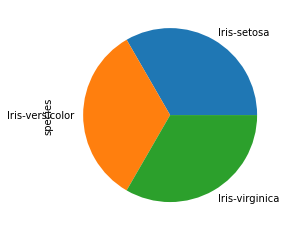

In [ ]:
# Plotting pie chart
print(data['species'].value_counts())
data['species'].value_counts().plot(kind='pie')
plt.show()

ดังที่เราเห็นในผลลัพธ์ คลาส Iris มีการกระจายอย่างเท่าเทียมกัน แต่ละอันเท่ากับ 33.3% ของชุดข้อมูล 
สิ่งนี้มีประโยชน์เพราะโมเดลการจำแนกประเภทส่วนใหญ่ทำงานได้ดีกับคลาสที่สมดุล หากคุณกำลังทำงานกับข้อมูลที่ไม่สมดุลมากๆ จะทำให้สร้าง Classifier ที่ดีออกมาได้ยาก โดยส่วนมากเราจะใช้ Technique Oversampling / Undersampling หรือใข้เทคนิค SMOTE ซึ่งเราจะกล่าวในโอกาสถัดไป 

### การสร้างกราฟ Box 
คือการ Plot Graph Box โดยแต่ละ Box จะแสดงค่า 
*   min
*   Q1
*   median
*   Q3
*   max

สามารถแสดงได้อย่างชัดเจนว่าในแต่ละ Class ของดอกไม้ แต่ละค่า Feature มีอยู่ในช่วง Range ไหนกันบ้าง

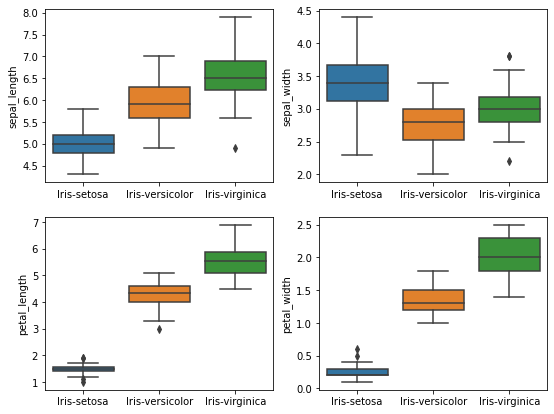

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (9, 7))
for ax, col in zip(axes.flatten(), data.columns) : 
  sns.boxplot(data = data, x = 'species', y = col, ax = ax) 
  ax.set_xlabel('')

### สร้างกราฟ Color-encoded matrix ระหว่าง Features

Color-encoded matrix สามารถให้เราเข้าใจได้ว่า Feature ในตัวแปร (X) มีความสัมพันธ์อย่างไร โดยทางเราจะใช้ Pearson correlation coefficient ใช้วัดความสัมพันธ์ระหว่างตัวแปรตัวเลขสองตัว มีค่าระหว่าง -1 ถึง 1 โดยที่ 1 ระบุถึงความสัมพันธ์เชิงเส้นที่สมบูรณ์แบบ และ -1 ระบุถึงความสัมพันธ์เชิงเส้นแบบผกผัน ฟังก์ชันของ pandas ชื่อ ``corr()`` คืนค่าความสัมพันธ์ระหว่างตัวแปรตัวเลขทั้งหมดของดาต้าเฟรม (DataFrame) นอกจากนี้เรายังสามารถใช้ฟังก์ชัน Seaborn ``heatmap()`` เพื่อแสดงค่าสัมพันธ์ให้เป็นเมทริกซ์ที่เข้ารหัสสี


In [ ]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


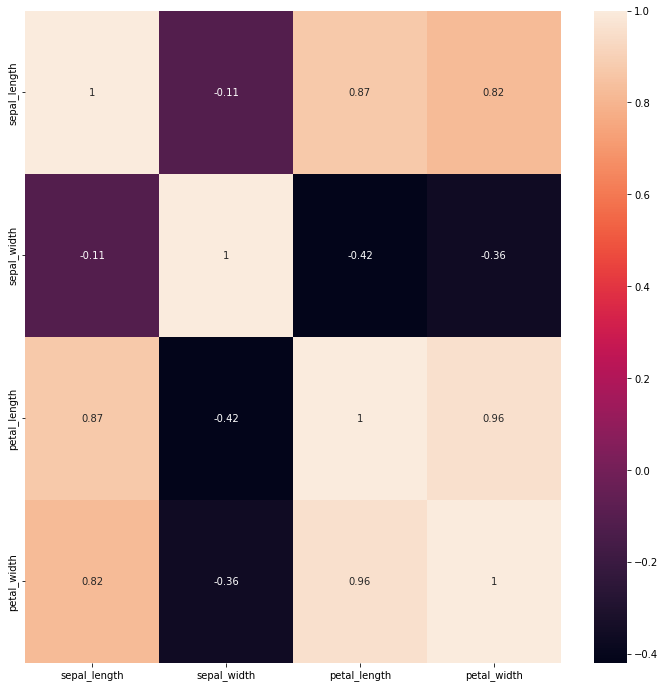

In [ ]:
# Drawing color-encoded matrix

plt.figure(figsize=(12, 12)) 
sns.heatmap(data.corr().round(decimals=2), annot=True) 
plt.show()

### สร้างกราฟ Scatter Plot
เพื่อให้เราเห็นความสัมพันธ์ของแต่ละ Columns ใน Feature X ในขณะที่แต้มสีจุดด้วย class y

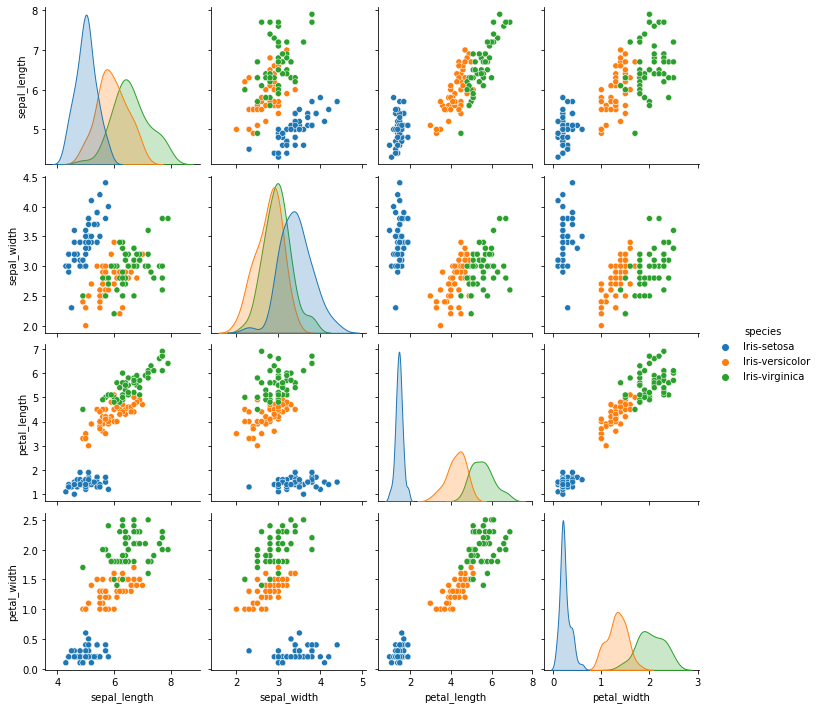

In [ ]:
sns.pairplot(data, hue='species')
plt.show()

## เริ่มต้น Classification
PyCaret การทำงานงั้นค่อนข้างง่าย แบ่งเป็น 3 ขั้นตอนหลักๆดังต่อไปนี้
1. PyCaret Project Setup
2. PyCaret Compare Model/Train Model/Tune Model
3. PyCaret Inference and Export Model

## การทำ PyCaret Model Setup
```
from pycaret.classfication import * 
setup(data=data, target='species', train_size = 0.8, session_id = 7402, numeric_features = numeric[:-1], categorical_features = categorical, transformation = True, normalize = True, transform_target = True) 
```
1. *data = dataframe ที่เราต้่องการที่จะนำไป Train (จำเป็นต้องใส่)
1. *target = Column เป้าหมาย (y) ที่เราต้่องการให้ Model เรียนรู้และสามารถ Predict ค่า target ได้อย่างแม่นยำ (จำเป็นต้องใส่)
1. train_size = 0.8 แบ่งข้อมูลของ data frame ที่ใส่มาให้ 80% ให้เป็น training set โดยเป็นการ Random หยิบแบบกระจายทั่วทั้ง Dataset มาให้ (Stratified sampling) และนำข้ออีก 20% ที่เหลือเป็น validation set.
1. session_id = เลขประจำ session เป็นเลขอะไรก็ได้ เราสามารถใช้อ้างอิงได้ภายหลัง
1. numeric_features = Numerical feature ที่เราต้องการให้เป็นส่วนนึงของ Input (x)
1. categorical_features = Categorical features ที่เราต้องการให้เป็นส่วนนึงของ Input (x)
1. Transformation = หากข้อมูลไม่เป็น Normal Distribution อาทิเช่นเอนเอียงไปด้านนึง เราควรปรับค่านี้ให้เป็น True ซึ่งระบบจะทำการแปลงข้่อมูลให้เป็น Normal Distribution ให้เรา
1. Normalize = ทำการแปลงค่า numeric_features ทั้งหมดให้อยู่ระหว่าง -1..1 โดยใช้หลักการของ z-score = (x - mean) / standard deviation
1. Transform_target = หากข้อมูลเป้าหมาย (y) ไม่เป็น Normal Distribution อาทิเช่นเอนเอียงไปด้านนึง เราควรปรับค่านี้ให้เป็น True ซึ่งระบบจะทำการแปลงข้่อมูลเป้าหมาย (y) ให้เป็น Normal Distribution ให้เรา



In [ ]:
# PyCaret environment setup.Setting different parameters in setup() function
# to prepare model training and deployment data.
from pycaret.classification import * 
classf = setup(data = data, target = 'species', train_size = 0.8,
normalize = True, session_id = 3934, fold=5)

INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: e103
INFO:logs:self.variable_keys: {'_gpu_n_jobs_param', 'y', '_all_metrics', 'y_test', 'exp_name_log', 'n_jobs_param', 'X_test', 'USI', '_ml_usecase', '_all_models_internal', '_all_models', 'y_train', 'seed', 'data', 'target_param', 'gpu_param', 'exp_id', 'X', 'display_container', 'memory', 'fold_groups_param', 'variable_keys', '_is_multiclass', 'fold_shuffle_param', 'fold_generator', 'html_param', 'X_train', 'logging_param', '_available_plots', 'fix_imbalance', 'log_plots_param', 'master_model_container', 'pipeline', 'idx'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.13
INFO:logs:python_build: ('default', 'Apr 24 2022 01:04:09')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=13617745920

,Description,Value
0,Session id,3934
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(120, 5)"
7,Transformed test set shape,"(30, 5)"
8,Numeric features,4
9,Preprocess,True


INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:setup() successfully completed in 3.25s...............


## Compare Models
เราสามารถใช้่คำสั่ง ``compare_models()`` เพื่อหา Model ที่ดีที่สุดในการทำ Classification
* Model = ชื่อ Model
* Accuracy - ค่าระหว่าง 0 ถึง 1 - จำนวนครั้งที่ทำนายถูก/จำนวนครั้งที่ทำนายทั้งหมด - ยิ่งเยอะยิ่งดี
* AUC - ค่าระหว่าง 0 ถึง 1 - ยิ่งเยอะยิ่งดี
* Recall - ค่าระหว่าง 0 ถึง 1 - จำนวนครั้งที่ทายว่าเป็น Class นั้นได้ถูกต้อง/จำนวนจริงๆของ Class นั้น - ยิ่งเยอะยิ่งดี
* Precision - ค่าระหว่าง 0 ถึง 1 - จำนวนครั้งที่ทายว่าเป็น Class นั้นได้ถูกต้อง/ จำนวนครั้งที่ทายว่าเป็น Class นั้น - ยิ่งเยอะยิ่งดี
* F1 - ค่าระหว่าง 0 ถึง 1 - Harmonic Mean ระหว่าง Recall และ Precision = (2 * Recall * Precision) / (Recall + Precision) - ยิ่งเยอะยิ่งดี
* Kappa - ค่าระหว่าง 0 ถึง 1  - (ความแม่นยำเฉลี่ยในแต่ละ Class ของ classifier - ความแม่นยำจากการเดา) / (1 - ความแม่นยำจากการเดา) - ยิ่งเยอะยิ่งดี
* MCC - ค่าระหว่าง 0 ถึง 1 - ค่า Correlation ระหว่างค่าที่ทำนาย และค่าที่เป็นเฉลย - ยิ่งเยอะยิ่งดี
* TT (Sec) - Time Taken (Sec) - ยิ่งน้อยยิ่งดี

In [ ]:
best = compare_models(fold=2, turbo=False)

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efdaa141e90>, include=None, fold=2, round=4, cross_validation=True, sort=Accuracy, n_select=1, budget_time=None, turbo=False, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, parallel=None, caller_params={'self': <pycaret.classification.oop.ClassificationExperiment object at 0x7efdaa141e90>, 'include': None, 'exclude': None, 'fold': 2, 'round': 4, 'cross_validation': True, 'sort': 'Accuracy', 'n_select': 1, 'budget_time': None, 'turbo': False, 'errors': 'ignore', 'fit_kwargs': None, 'groups': None, 'experiment_custom_tags': None, 'probability_threshold': None, 'engines': None, 'verbose': True, 'parallel': None, '__class__': <class 'pycaret.classification.oop.ClassificationExperiment'>}, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9917,0.9992,0.9917,0.9921,0.9917,0.9875,0.9877,0.2150
qda,Quadratic Discriminant Analysis,0.9750,0.9979,0.9750,0.9754,0.9750,0.9625,0.9627,0.1950
et,Extra Trees Classifier,0.9667,0.9965,0.9667,0.9682,0.9666,0.9500,0.9508,0.3850
nb,Naive Bayes,0.9583,0.9938,0.9583,0.9587,0.9583,0.9375,0.9377,0.1600
rbfsvm,SVM - Radial Kernel,0.9583,0.9931,0.9583,0.9602,0.9583,0.9375,0.9385,0.1700
mlp,MLP Classifier,0.9583,0.9969,0.9583,0.9587,0.9583,0.9375,0.9377,0.5300
rf,Random Forest Classifier,0.9583,0.9921,0.9583,0.9601,0.9582,0.9375,0.9385,0.4900
dt,Decision Tree Classifier,0.9500,0.9625,0.9500,0.9556,0.9497,0.9250,0.9280,0.1050
lr,Logistic Regression,0.9500,0.9906,0.9500,0.9500,0.9500,0.9250,0.9250,3.1750
gbc,Gradient Boosting Classifier,0.9500,0.9762,0.9500,0.9533,0.9498,0.9250,0.9269,0.4100


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 6.0725212097167966e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efdaa141e90>, estimator=lr, fold=StratifiedKFold(n_splits=2, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=True, metrics=None, display=<pycaret.internal.display.display.CommonDisplay object at 0x7efd96b74250>, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported successfully


INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)
INFO:logs:compare_models() successfully completed......................................


In [ ]:
best

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

## Plot Model 
เราสามารถ Plot กราฟต่างๆของ Model ได้ด้วย ``plot_model({model}, plot='{ประเภทกราฟที่จะ Plot}', scale=1)`` โดยเราสามารถเลือกได้ดังนี้

1. ‘pipeline’ - Schematic drawing of the preprocessing pipeline
1. ‘residuals_interactive’ - Interactive Residual plots
1. ‘residuals’ - Residuals Plot (Default Value)
1. ‘error’ - Prediction Error Plot
1. ‘cooks’ - Cooks Distance Plot
1. ‘rfe’ - Recursive Feat. Selection
1. ‘learning’ - Learning Curve
1. ‘vc’ - Validation Curve
1. ‘manifold’ - Manifold Learning
1. ‘feature’ - Feature Importance
1. ‘feature_all’ - Feature Importance (All)
1. ‘parameter’ - Model Hyperparameter
1. ‘tree’ - Decision Tree

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=error, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=2, self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efdaa141e90>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: error
INFO:logs:Fitting Model
  "X does not have valid feature names, but"

INFO:logs:Scoring test/hold-out set


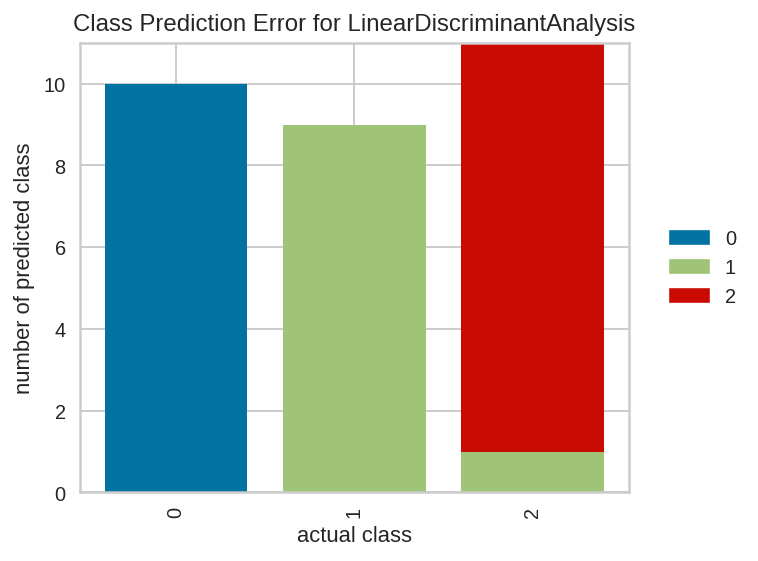

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [ ]:
plot_model(best, plot="error", scale=2)

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=feature, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1.25, self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efdaa141e90>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: feature


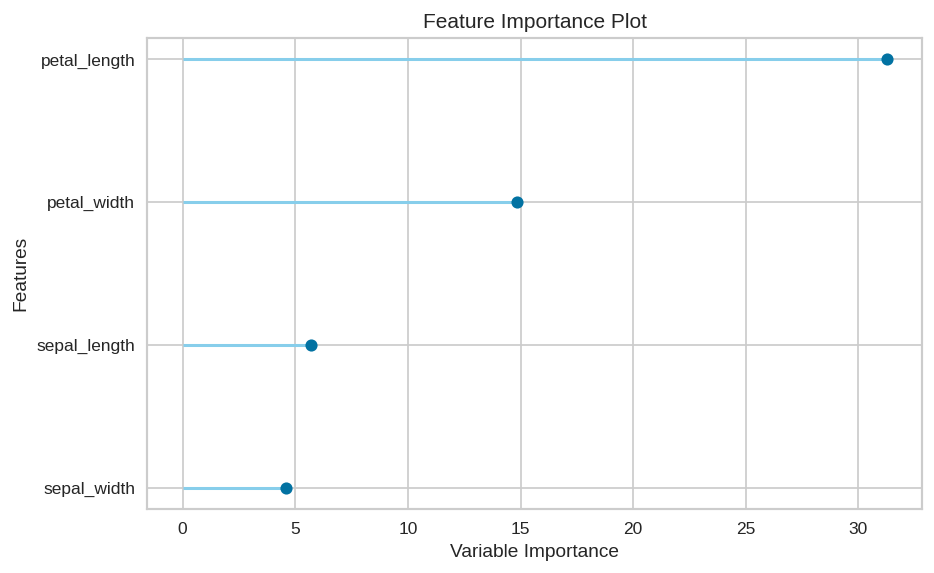

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [ ]:
plot_model(best, plot='feature', scale=1.25)

หรือดูทั้งหมดทีเดียวด้วย ``evaluate_model(model)``

In [ ]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efdaa141e90>, estimator=LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Create a Model (สร้าง Model)
ต่อจากนี้เราจะเรียนรู้วิธีการ Train AI Model Classification จากรายการ Model ที่ PyCaret เตรียมไว้ให้ ซึ่งมีดังต่อไปนี้
  * 'lr' - Logistic Regression
  * 'knn' - K Neighbors Classifier
  * 'nb' - Naive Bayes
  * 'dt' - Decision Tree Classifier
  * 'svm' - SVM - Linear Kernel
  * 'rbfsvm' - SVM - Radial Kernel
  * 'gpc' - Gaussian Process Classifier
  * 'mlp' - MLP Classifier
  * 'ridge' - Ridge Classifier
  * 'rf' - Random Forest Classifier
  * 'qda' - Quadratic Discriminant Analysis
  * 'ada' - Ada Boost Classifier
  * 'gbc' - Gradient Boosting Classifier
  * 'lda' - Linear Discriminant Analysis
  * 'et' - Extra Trees Classifier
  * 'xgboost' - Extreme Gradient Boosting
  * 'lightgbm' - Light Gradient Boosting Machine
  * 'catboost' - CatBoost Classifier

โดยการสร้าง Model ทำได้โดยคำสั่งต่อไปนี้
``create_model({Model_Name}, fold=10)``
* Model Name ข้างต้น
* Fold คือจำนวน Fold Cross Validation ส่วนมากจะเป็นค่า 10 Folds แต่ถ้าหากรีบสามารถลดลงมาได้

สมมุตืว่าจะตาราง เราเห็นว่า Model ที่ดีที่สุด ถึงสร้่างมาแล้วด้วยโมเดล Linear Discriminant Analysis (lda) (ซึ่งอยู่ใน Parameter ``best`` ที่คืนมาจาก ``compare_model()``) เราอยากจะลอง Train Model ชื่อว่า ``Decision Tree (dt)`` เนื่องจากสามารถ Demo ความสามารถของ Library PyCaret ได้ครบถ้่วน เราจะลองสร้าง model นี้กัน, tune model และทำ Ensemble Model ให้ดีที่สุด


In [ ]:
# สร้าง Model
model = create_model('dt', fold = 2)

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=dt, fold=2, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, metrics=None, display=None, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9667,0.9750,0.9667,0.9667,0.9667,0.9500,0.9500
1,0.9333,0.9500,0.9333,0.9444,0.9327,0.9000,0.9061
Mean,0.9500,0.9625,0.9500,0.9556,0.9497,0.9250,0.9280
Std,0.0167,0.0125,0.0167,0.0111,0.0170,0.0250,0.0220


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Decision Tree Classifier Imported successfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=2, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best')
INFO:logs:create_model() successfully completed......................................


ค่า F1 เป็นค่าที่นักวิจัยส่วนใหญ่ยอมรับ หลังจากที่เราลองสร้าง Model แล้ว ได้ค่า **0.9497** ยิ่งมากยิ่งดี

## Confusion Matrix
Confusion Matrix เป็นการแสดงการผลของการทำนายว่าการทำนายนั้น Predict จาก Class ไหนผิด Class ไหนบ้าง ซึ่งมีประโยชน์มากๆ ในการหาช่องทางพัฒนาให้โมเดลทำงานได้ดีขึ้น

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=confusion_matrix, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best'), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: confusion_matrix
INFO:logs:Fitting Model
  "X does not have valid feature names, but"

INFO:logs:Scoring test/hold-out set


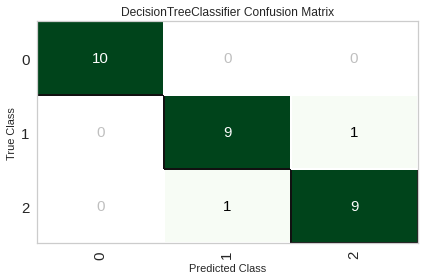

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [ ]:
# Plot Model
plot_model(model, 'confusion_matrix')

## Evaluate Model
ดูผลด้านอื่นๆ ของโมเดลนี้

In [ ]:
evaluate_model(model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## ลองใช้ Model ของที่เราสร้าง
เราสามารถใช้ ``predict_model({model})`` เพื่อทดสอบเอา Validation set ของ Model Setup ที่เราเตรียมไว้ เข้ามาลอง Inference model ดูว่าผลและมีความแม่นยำมากแค่ไหน

In [ ]:
predictions = predict_model(model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best'), probability_threshold=None, encoded_labels=False, raw_score=False, drift_report=False, round=4, verbose=True, ml_usecase=None, preprocess=True, replace_labels_in_column=<function _SupervisedExperiment.predict_model.<locals>.replace_labels_in_column at 0x7efd7a173830>)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9333,0.9500,0,0,0,0.9000,0.9000


  UserWarning,

  UserWarning,

  UserWarning,

  UserWarning,

  UserWarning,

  UserWarning,



ข้างล่างคือ ดูผลการ inference model บนข้อมูล validation set


In [ ]:
predictions

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
120,-1.558946,0.327655,-1.345455,-1.334797,Iris-setosa,Iris-setosa,1.0
121,-1.188504,0.093616,-1.288725,-1.467944,Iris-setosa,Iris-setosa,1.0
122,-0.447618,-1.778701,0.129534,0.129818,Iris-versicolor,Iris-versicolor,1.0
123,2.515924,1.731893,1.491063,1.061846,Iris-virginica,Iris-virginica,1.0
124,1.651557,1.263813,1.320872,1.727580,Iris-virginica,Iris-virginica,1.0
125,-1.188504,0.093616,-1.288725,-1.467944,Iris-setosa,Iris-setosa,1.0
126,-1.188504,-1.544661,-0.267578,-0.269622,Iris-versicolor,Iris-versicolor,1.0
127,-0.571099,0.795735,-1.288725,-1.068503,Iris-setosa,Iris-setosa,1.0
128,-1.558946,0.093616,-1.288725,-1.334797,Iris-setosa,Iris-setosa,1.0
129,1.281115,0.093616,0.753568,1.461286,Iris-virginica,Iris-virginica,1.0


## ลองกับข้อมูลของเราเองกันเถอะ
เราสามารถใช้ ``predict_model({model}, data={unseen_dataframe})`` เพื่อทดลองกับ Model ที่เรา Train ได้

สร้าง dataframe ที่มีตัวแปรตรงกันกับข้อมูล insurance

In [ ]:
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
data.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


เราแก้ไขเองข้างล่างได้เลยที่ variable ``unseen``

In [ ]:
unseen = {
    "sepal_length":[5,8], 
    "sepal_width":[3,3],
    "petal_length":[1, 5],
    "petal_width":[0,3]
    }
unseen_df = pd.DataFrame(unseen) # D,F ตัวใหญ่เสมอ

In [ ]:
unseen_df

,sepal_length,sepal_width,petal_length,petal_width
0,5,3,1,0
1,8,3,5,3


In [ ]:
predict_model(model, data=unseen_df)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best'), probability_threshold=None, encoded_labels=False, raw_score=False, drift_report=False, round=4, verbose=True, ml_usecase=None, preprocess=True, replace_labels_in_column=<function _SupervisedExperiment.predict_model.<locals>.replace_labels_in_column at 0x7efd808683b0>)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


INFO:logs:Set up data.


,sepal_length,sepal_width,petal_length,petal_width,Label,Score
0,-1.065023,-0.140424,-1.572377,-1.601090,Iris-setosa,1.0
1,2.639404,-0.140424,0.696838,2.393314,Iris-virginica,1.0


## Model Tuning

เราสามารถ Tune Model โดยใช้ Default ไปเลยก็ได้ 

In [ ]:
tuned_model = tune_model(model, optimize = 'F1',tuner_verbose=True)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best'), fold=None, round=4, n_iter=10, custom_grid=None, optimize=F1, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=True, fit_kwargs=None, groups=None, return_tuner=False, verbose=True, tuner_verbose=True, return_train_score=False, kwargs={}, self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>)
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.9792,0.9583,0.9630,0.9582,0.9375,0.9400
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8333,0.8854,0.8333,0.8444,0.8307,0.7500,0.7579
4,0.9583,0.9792,0.9583,0.9630,0.9582,0.9375,0.9400
Mean,0.9500,0.9688,0.9500,0.9541,0.9494,0.9250,0.9276
Std,0.0612,0.0427,0.0612,0.0573,0.0622,0.0919,0.0890


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Decision Tree Classifier
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV


Fitting 5 folds for each of 10 candidates, totalling 50 fits


INFO:logs:best_params: {'actual_estimator__min_samples_split': 7, 'actual_estimator__min_samples_leaf': 2, 'actual_estimator__min_impurity_decrease': 0.3, 'actual_estimator__max_features': 'sqrt', 'actual_estimator__max_depth': 5, 'actual_estimator__criterion': 'entropy'}
INFO:logs:Hyperparameter search completed
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best'), fold=StratifiedKFold(n_splits=5, random_state=None, shuffle=False), round=4, cross_validation

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 2
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.3, min_samples_leaf=2,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best')
INFO:logs:create_model() successfully completed......................................
INFO:logs:SubProcess create_model() end ==================================
INFO:logs:choose_better activated
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_wei

หรือกำหนด Hyperparamater Search ก็ได้ โดยสำหรับ Decision Tree สามารถดูได้ที่นี่ https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
params = {'max_depth': [1,2, 3, 4, 5, 6, 7, 8],
        'criterion': ["gini","entopy","log_loss"], 
        'min_samples_split':[1,2,3,4,5]}
tuned_model = tune_model(model, optimize = 'F1', tuner_verbose=True, fold=2, custom_grid = params, n_iter=10)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best'), fold=2, round=4, n_iter=10, custom_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'criterion': ['gini', 'entopy', 'log_loss'], 'min_samples_split': [1, 2, 3, 4, 5]}, optimize=F1, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=True, fit_kwargs=None, groups=None, return_tuner=False, verbose=True, tuner_verbose=True, return_train_score=False, kwargs={}, self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>)
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9833,0.9867,0.9833,0.9841,0.9833,0.9750,0.9754
1,0.9333,0.9608,0.9333,0.9360,0.9332,0.9000,0.9015
Mean,0.9583,0.9737,0.9583,0.9601,0.9582,0.9375,0.9385
Std,0.0250,0.0129,0.0250,0.0241,0.0251,0.0375,0.0370


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Decision Tree Classifier
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:custom_grid: {'actual_estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'actual_estimator__criterion': ['gini', 'entopy', 'log_loss'], 'actual_estimator__min_samples_split': [1, 2, 3, 4, 5]}
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV


Fitting 2 folds for each of 10 candidates, totalling 20 fits


14 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pycaret/internal/pipeline.py", line 158, in fit
    _fit_one(self._final_estimator, X, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/pycaret/internal/pipeline.py", line 36, in _fit_one
    transformer.fit(*args, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best')
INFO:logs:create_model() successfully completed......................................
INFO:logs:SubProcess create_model() end ==================================
INFO:logs:choose_better activated
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=N

จากที่เห็นข้างต้น ค่า F1 ดีขึ้น ตอนนี้มีค่า **0.9582** เพิ่มขึ้นนิดเดียว

## ลองดู Confusion Matrix อีกรอบ
F1 ดีขึ้นนิดเดียว แต่ก็ไม่ได้ดีขึ้นเลย ใน Validation set

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=confusion_matrix, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best'), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: confusion_matrix
INFO:logs:Fitting Model
  "X does not have valid feature names, but"

INFO:logs:Scoring test/hold-out set


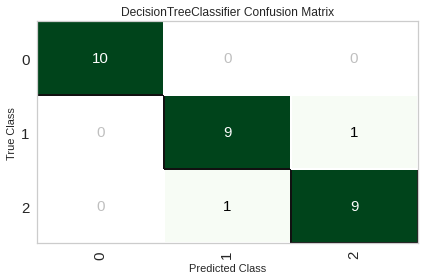

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [ ]:
# Plotting the model

plot_model(tuned_model, 'confusion_matrix')

## Ensemble Learning 
ในกรณีที่เราไม่สามารถ Tune ให้ดีขึ้นได้จริงๆ เราสามารถใช้ Ensemble Learning มาช่วยให้เราสามารถใช้ Model มากกว่า 1 ตัว มาช่วยกันตัดสินใจได้ ซึ่งมีวิธีการทำได้ถึง 3 แบบดังนี้

* Bagging
* Boosting
* Stacking


### Bagging
![](https://www.kdnuggets.com/wp-content/uploads/Budzik-fig1-ensemble-learning.jpg)

1. Random ข้่อมูลขึ้นมา K ชุดโดยที่สามารถเลือกซ้ำได้
1. นำข้อมูลชุด K มา Train Model ต่างคนต่าง Train ได้มา K models
1. เมื่อได้ Model K ตัวแล้ว มีได้โจทย์ Prediction มาส่ง Model K ตัว ตัดสินใจว่าเป็น Class ใด หาก Class ไหนได้คะแนนเยอะสุด Class นั้นคือคำตอบ (เหมือนสภาผู้แทนราษฎร)

* n_estimators = จำนวน K
* optimize = เน้น Optimize ที่ค่าอะไร
* method = "Bagging" คือเลือกใช้วิธี Bagging

In [ ]:
bagged_dt = ensemble_model(tuned_model, method = 'Bagging', n_estimators=5, optimize="F1", verbose=True)

INFO:logs:Initializing ensemble_model()
INFO:logs:ensemble_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best'), method=Bagging, fold=None, n_estimators=5, round=4, choose_better=False, optimize=F1, fit_kwargs=None, groups=None, probability_threshold=None, verbose=True, return_train_score=False)
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.9948,0.9583,0.9630,0.9582,0.9375,0.9400
1,0.9583,0.9896,0.9583,0.9630,0.9582,0.9375,0.9400
2,0.9583,1.0000,0.9583,0.9630,0.9582,0.9375,0.9400
3,0.8750,0.9505,0.8750,0.9091,0.8704,0.8125,0.8322
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9500,0.9870,0.9500,0.9596,0.9490,0.9250,0.9304
Std,0.0408,0.0186,0.0408,0.0290,0.0425,0.0612,0.0543


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Decision Tree Classifier
INFO:logs:Importing untrained ensembler
INFO:logs:Ensemble method set to Bagging
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=8,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                  

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 7
INFO:logs:display_container: 7
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=8,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_samples_leaf=1,
                                                        min_samples_split=4,
                                                        min_weight_fraction_leaf=0.0,
                                                        random_state=393

หลังจากที่เราลองแล้ว ปรากฎว่าแย่ลงด้วยซ้ำ

### Boosting
![](https://www.kdnuggets.com/wp-content/uploads/Budzik-fig2-ensemble-learning.jpg)

1. Random ข้่อมูล Subset ของ Training set แบบเท่าเทียมกันก่อน ขึ้นมาชุดแรก
2. Train Model แรก
3. นำ Training Dataset มาทดสอบ กับโมเดลแรก หากข้อมูล Row ไหนทำนายผิด จะให้ Weight นำหนักในการ Random ข้อมูลใน Row นั้นมากขึ้น
4. Random ข้่อมูล Subset ของ Training set แบบเน้นน้ำหนักตัวที่ทำนายผิด (เลือกตัวเดิมได้) ขึ้นมาชุดที่สอง
5. ย้่อนกลับที่ 2 จนกระทั้งครบจำนวน K ครั้ง
6. เมื่อครบแล้ว เวลาต้องทำ Prediction จะเอาผลเฉลี่ยของคำตอบมาเป็นคำอบ โดยให้น้ำหนักกับผลคำตอบของรอบๆหลังมากกว่ารอบแรกๆ

จินตรนาการ ง่ายๆ เหมือนเราจะสอนเนื้อหาใหม่ให้เด็ก ป.1 - ป.6 มาเรียนรู้ โดยที่เริ่มสอนจากเด็ก ป.1 ก่่อน อะไรทืี่เด็ก ป.1 ตอบผิด จะมาสอนซ้ำๆในเด็ก ป.2 มากขึ้น ไปเรื่อยๆ และเมื่อสอน ป.1 - ป.6 ครบแล้ว เราก็ถามคำถามใหม่ ทั้ง 6 คนพร้อมกัน โดยให้น้ำหนักคำตอบของเด็ก ป.1 น้อยสุด แต่เด็ก ป.6 เยอะสุด เอามาเฉลี่ยกันแล้วตอบออกเป็นคำตอบ

![](https://ichef.bbci.co.uk/news/976/cpsprodpb/115F/production/_98974440_gettyimages-534037992.jpg)

In [ ]:
boosted_dt = ensemble_model(tuned_model, method = 'Boosting', n_estimators=5, optimize="F1", verbose=True)

INFO:logs:Initializing ensemble_model()
INFO:logs:ensemble_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best'), method=Boosting, fold=None, n_estimators=5, round=4, choose_better=False, optimize=F1, fit_kwargs=None, groups=None, probability_threshold=None, verbose=True, return_train_score=False)
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.9688,0.9583,0.9630,0.9582,0.9375,0.9400
1,0.9583,1.0000,0.9583,0.9630,0.9582,0.9375,0.9400
2,0.9583,0.9688,0.9583,0.9630,0.9582,0.9375,0.9400
3,0.8333,0.8984,0.8333,0.8444,0.8307,0.7500,0.7579
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9417,0.9672,0.9417,0.9467,0.9410,0.9125,0.9156
Std,0.0565,0.0371,0.0565,0.0531,0.0575,0.0848,0.0822


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Decision Tree Classifier
INFO:logs:Importing untrained ensembler
INFO:logs:Ensemble method set to Boosting
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                      

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 8
INFO:logs:display_container: 8
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=4,
                                                         min_weight_fraction_leaf=0.0,
                      

### Stacking
![](https://www.kdnuggets.com/wp-content/uploads/Budzik-fig3-ensemble-learning.jpg)

1. สร้าง K โมเดลโดยให้เข้าถึง Training Set 100% ทั้งหมด
2. เอาผล Prediction ของแต่ละ K โมเดล มาเป็น 1 Feature Column (X) ของโมเดลรวมสุดท้่าย
3. เทรนโมเดลสุดท้ายด้วยการใช้ Linear Combination (ใช้โมเดล neural network หรือ logistic regression) เพื่อนำ Feature X มาเลือกคำคอบสุดท้ายที่ใช้ Predict y
  

In [ ]:
# train a few models
lr = create_model('lr')
dt = create_model('dt')
knn = create_model('knn')

# stack models
stacker = stack_models([lr, dt, knn])

# ดูตารางสุดท้าย F1 ก็ยังเป็น 0.9540

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=lr, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, metrics=None, display=None, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,1.0000,0.9583,0.9630,0.9582,0.9375,0.9400
1,0.9583,1.0000,0.9583,0.9630,0.9582,0.9375,0.9400
2,0.9583,1.0000,0.9583,0.9630,0.9582,0.9375,0.9400
3,0.9167,0.9896,0.9167,0.9167,0.9167,0.8750,0.8750
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9583,0.9979,0.9583,0.9611,0.9582,0.9375,0.9390
Std,0.0264,0.0042,0.0264,0.0264,0.0264,0.0395,0.0395


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported successfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=5, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 9
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3934, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() successfully completed......................................
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=dt, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, metrics=None, display=None, model_only=True, return_tra

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.9688,0.9583,0.9630,0.9582,0.9375,0.9400
1,0.9583,0.9688,0.9583,0.9630,0.9582,0.9375,0.9400
2,0.9583,0.9688,0.9583,0.9630,0.9582,0.9375,0.9400
3,0.8333,0.8750,0.8333,0.8444,0.8307,0.7500,0.7579
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9417,0.9562,0.9417,0.9467,0.9410,0.9125,0.9156
Std,0.0565,0.0424,0.0565,0.0531,0.0575,0.0848,0.0822


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Decision Tree Classifier Imported successfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=5, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 10
INFO:logs:display_container: 10
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best')
INFO:logs:create_model() successfully completed......................................
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=knn, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, metrics=None, display=

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,1.0000,0.8750,0.9091,0.8704,0.8125,0.8322
1,0.9583,0.9974,0.9583,0.9630,0.9582,0.9375,0.9400
2,0.9583,1.0000,0.9583,0.9630,0.9582,0.9375,0.9400
3,0.9583,0.9974,0.9583,0.9630,0.9582,0.9375,0.9400
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9500,0.9990,0.9500,0.9596,0.9490,0.9250,0.9304
Std,0.0408,0.0013,0.0408,0.0290,0.0425,0.0612,0.0543


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:K Neighbors Classifier Imported successfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=5, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 11
INFO:logs:display_container: 11
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() successfully completed......................................
INFO:logs:Initializing stack_models()
INFO:logs:stack_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator_list=[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3934, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,1.0000,0.9583,0.9630,0.9582,0.9375,0.9400
1,0.9583,1.0000,0.9583,0.9630,0.9582,0.9375,0.9400
2,0.9583,1.0000,0.9583,0.9630,0.9582,0.9375,0.9400
3,0.8333,0.9844,0.8333,0.8444,0.8307,0.7500,0.7579
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9417,0.9969,0.9417,0.9467,0.9410,0.9125,0.9156
Std,0.0565,0.0062,0.0565,0.0531,0.0575,0.0848,0.0822


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

INFO:logs:Getting model names
INFO:logs:[('Logistic Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3934, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('Decision Tree Classifier', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best')), ('K Neighbors Classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
INFO

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 12
INFO:logs:display_container: 12
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=3934,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                             

### ทำไม?
มาดูข้อมูล 2 Row ที่มันยังไงก็ทายผิดกันเถอะ

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=confusion_matrix, fold=None, use_train_data=False, verbose=False, display=None, display_format=None, estimator=StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=3934,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                       

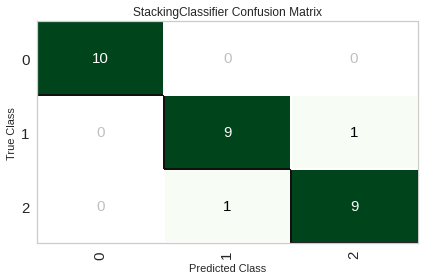

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [ ]:
plot_model(stacker, 'confusion_matrix', verbose=False)

In [ ]:
predictions = predict_model(stacker)
predictions["correct"] = predictions["Label"]==predictions["species"]

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=3934,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                      

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9333,0.9967,0,0,0,0.9000,0.9000


  UserWarning,

  UserWarning,

  UserWarning,

  UserWarning,

  UserWarning,

  UserWarning,



In [ ]:
predictions

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score,correct
120,-1.558946,0.327655,-1.345455,-1.334797,Iris-setosa,Iris-setosa,0.9918,True
121,-1.188504,0.093616,-1.288725,-1.467944,Iris-setosa,Iris-setosa,0.9875,True
122,-0.447618,-1.778701,0.129534,0.129818,Iris-versicolor,Iris-versicolor,0.9772,True
123,2.515924,1.731893,1.491063,1.061846,Iris-virginica,Iris-virginica,0.9823,True
124,1.651557,1.263813,1.320872,1.727580,Iris-virginica,Iris-virginica,0.9904,True
125,-1.188504,0.093616,-1.288725,-1.467944,Iris-setosa,Iris-setosa,0.9875,True
126,-1.188504,-1.544661,-0.267578,-0.269622,Iris-versicolor,Iris-versicolor,0.9709,True
127,-0.571099,0.795735,-1.288725,-1.068503,Iris-setosa,Iris-setosa,0.9800,True
128,-1.558946,0.093616,-1.288725,-1.334797,Iris-setosa,Iris-setosa,0.9901,True
129,1.281115,0.093616,0.753568,1.461286,Iris-virginica,Iris-virginica,0.9786,True


In [ ]:
#Show only incorrect data
predictions[predictions["correct"]==False]

,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score,correct
139,-1.188504,-1.310622,0.413186,0.662405,Iris-virginica,Iris-versicolor,0.8281,False
148,0.169786,-0.842542,0.753568,0.529259,Iris-versicolor,Iris-virginica,0.9034,False


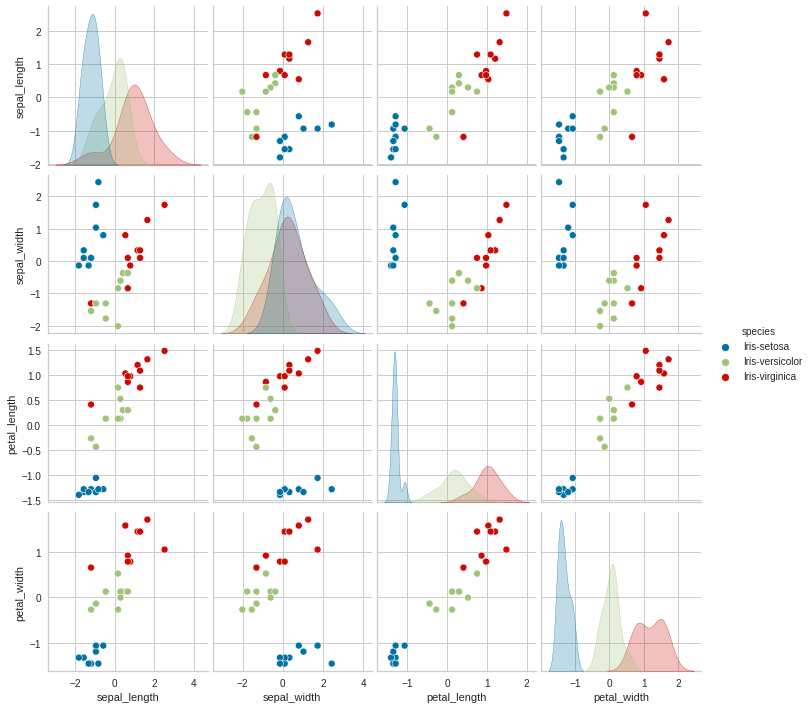

In [ ]:
# Show data it is incorrect
sns.pairplot(predictions[["sepal_length","sepal_width","petal_length","petal_width","species"]], hue='species')
plt.show()

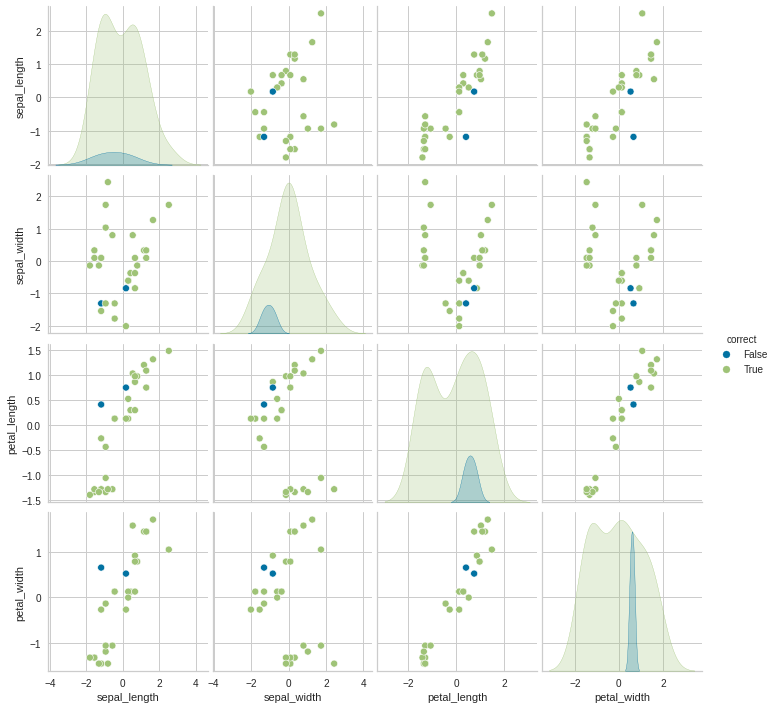

In [ ]:
# Show data it is incorrect
sns.pairplot(predictions[["sepal_length","sepal_width","petal_length","petal_width","correct"]], hue='correct')
plt.show()

## บันทึก Model ที่เรา Train และนำไปใช้จริง

เมื่อเราได้ Model ที่พร้อมแล้ว เราสามารถทำ ``finalize_model({Model})`` **เพื่อทำการ Train Model บน Dataset ทั้่งหมด (ALL) ใหม่** เพื่อให้โมเดลได้เรียนรู้บน Data ให้ได้มากที่สุดบนรูปแบบ Estimator (Model) และ Hyperparamters ที่เราได้เลือกและได้กำหนดค่าไว้ในตัวแปร {Model}

In [ ]:
final_model = finalize_model(tuned_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efd80be6f50>, estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best'), fit_kwargs=None, groups=None, model_only=False, experiment_custom_tags=None)
INFO:logs:Finalizing DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       random_state=3934, splitter='best')
INFO:logs:Initializing create_mod

## บันทึก Finalize Model เป็นไฟล์
``save_model({Model}, "ชื่อไฟล์")``

In [ ]:
save_model(final_model, 'iris_tuned_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              mi...
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
       

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               mi...
                                     transformer=StandardScaler(copy=True,
                                                                with_mean=True,
                                                        

บันทึก Model ลงชื่อไฟล์ iris_tune_model.pkl สามารถไปดูได้ที่ Folder Windows ด้านซ้าย

## วิธีการโหลด Model ไปใช้
ใช้คำสั่ง ``load_model({PATH})``

In [ ]:
loaded_model = load_model('iris_tuned_model')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=iris_tuned_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


แล้วนำไป predict_model ได้เลย

In [ ]:
result = predict_model(loaded_model, data=unseen_df)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7efdaa141e90>, estimator=Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              mi...
                                    transformer=StandardScaler(co

INFO:logs:Set up data.


In [ ]:
result

,sepal_length,sepal_width,petal_length,petal_width,Label,Score
0,-1.021849,-0.124958,-1.568735,-1.575923,Iris-setosa,1.0
1,2.613187,-0.124958,0.705893,2.368266,Iris-virginica,1.0


In [ ]:
list(result["Label"])

['Iris-setosa', 'Iris-virginica']

## Exercises
1. ลอง Train Model Classifier บน Dataset นี้ด้วย LDA
1. ลอง Tuned Model ให้แม่นยำยิ่งขึ้น


# Time-Series


ทำนายข้อมูลในอนาคตด้วยการทำนายราคา Bitcoin กันโดยดึงข้อมูลในรูปแบบ CSV มาจากเว็บ https://www.blockchain.com/charts/market-price

## Time-Series vs Regression?
* Time-series **ไม่สามารถใช้วิธีการแบ่งข้อมูลแบบเดียวกับงาน Regression** เพราะ Regression/Classification ใช้วิธีแบ่งข้อมูล Stratified random sampling ซึ่งเนื่องจากข้อมูลในอนาคตที่เราต้องการทำนายจะ Leak เราต้องแบ่งเป็น Rolling / Sliding Windows บน Dataset เพื่อให้ Fair ในการวัดผล
* **Model Algorithm?** Regression กับ Time-Series Data มีความใกล้เคียงกัน แต่อยู่บนสันนินาฐที่ต่างกัน อาทิเช่นเรื่องความเป็น Seasonal ที่ Time-Series Data Prediction เอามาใช้ประโยชน์ได้ และมี Model ที่สร้างมาเพื่องานนี้แตกต่างกัน

In [ ]:
! wget -O bitcoin.csv https://raw.githubusercontent.com/iapp-technology/training_datasets/main/market-price-all.csv

--2022-08-14 07:49:46--  https://raw.githubusercontent.com/iapp-technology/training_datasets/main/market-price-all.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45473 (44K) [text/plain]
Saving to: ‘bitcoin.csv’

bitcoin.csv         100%[===================>]  44.41K  --.-KB/s    in 0.001s  

2022-08-14 07:49:46 (57.5 MB/s) - ‘bitcoin.csv’ saved [45473/45473]



เปิด Tab File ด้านขวา จะเจอไฟล์ชื่อ bitcoin.csv ทำการ Double Click เพื่อดูเนื้อหาได้เลย

In [ ]:
bitcoin_df = pd.read_csv("bitcoin.csv")

In [ ]:
bitcoin_df

,Timestamp,market-price
0,2009-01-03 00:00:00,0.00
1,2009-01-06 00:00:00,0.00
2,2009-01-09 00:00:00,0.00
3,2009-01-12 00:00:00,0.00
4,2009-01-15 00:00:00,0.00
...,...,...
1652,2022-07-30 00:00:00,23792.00
1653,2022-08-02 00:00:00,23298.94
1654,2022-08-05 00:00:00,22608.30
1655,2022-08-08 00:00:00,23174.25


In [ ]:
# dataframe จัดกลุ่มรวมยอด ตามวันที่
bitcoin_df=bitcoin_df.groupby('Timestamp',as_index=True).sum()

In [ ]:
bitcoin_df

,market-price
Timestamp,
2009-01-03 00:00:00,0.00
2009-01-06 00:00:00,0.00
2009-01-09 00:00:00,0.00
2009-01-12 00:00:00,0.00
2009-01-15 00:00:00,0.00
...,...
2022-07-30 00:00:00,23792.00
2022-08-02 00:00:00,23298.94
2022-08-05 00:00:00,22608.30


In [ ]:
#แปลง index ที่เป็นอยู่ date ให้เป็น date_time
bitcoin_df.index=pd.to_datetime(bitcoin_df.index)

In [ ]:
bitcoin_df

,market-price
Timestamp,
2009-01-03,0.00
2009-01-06,0.00
2009-01-09,0.00
2009-01-12,0.00
2009-01-15,0.00
...,...
2022-07-30,23792.00
2022-08-02,23298.94
2022-08-05,22608.30


In [ ]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1657 entries, 2009-01-03 to 2022-08-11
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market-price  1657 non-null   float64
dtypes: float64(1)
memory usage: 25.9 KB


## Time-Series Prediction

Time-Series Prediction ของ PyCaret ไม่ได้ใช้บนพื้นฐานของ Scikit Learn ตามปกติที่เราทำกัน ตัวนี้สร้างบนพื้นฐานของ Facebook Phophet Engine  https://facebook.github.io/prophet/

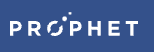

เป็น Library การคาดการณ์ข้อมูลอนุกรมเวลาตามแบบจำลองการเติมซึ่งแนวโน้มที่ไม่เป็นเชิงเส้นเหมาะสมกับฤดูกาลประจำปี รายสัปดาห์ และรายวัน บวกกับเอฟเฟกต์วันหยุด ทำงานได้ดีที่สุดกับอนุกรมเวลาที่มีผลตามฤดูกาลที่แข็งแกร่งและข้อมูลทางประวัติศาสตร์หลายฤดูกาล 

Phophet มีความแข็งแกร่งต่อข้อมูลที่ขาดหายไปและการเปลี่ยนแปลงในแนวโน้ม และโดยทั่วไปแล้วจะจัดการกับค่าผิดปกติได้ดี

```
from pycaret.time_series import *
exp_name = setup(data = bitcoin_df, target="market-price",  fh = 12)
```

ค่า Parameter ในการ Setup มีดังนี้

1. *data = dataframe ที่เราต้่องการที่จะนำไป Train (จำเป็นต้องใส่)
1. *target = Column เป้าหมาย (y) ที่เราต้่องการให้ Model เรียนรู้และสามารถ Predict ค่า target ได้อย่างแม่นยำ (จำเป็นต้องใส่)
1. session_id = เลขประจำ session เป็นเลขอะไรก็ได้ เราสามารถใช้อ้างอิงได้ภายหลัง
1. Transform_target = หากข้อมูลเป้าหมาย (y) ไม่เป็น Normal Distribution อาทิเช่นเอนเอียงไปด้านนึง เราควรปรับค่านี้ให้เป็น True ซึ่งระบบจะทำการแปลงข้่อมูลเป้าหมาย (y) ให้เป็น Normal Distribution ให้เรา
1. fh = จำนวนข้อมูลที่เราต้องการที่จะให้ Model ของเรา Forecast
1. seasonal_period: ปรับค่า Seasonal_Period ที่โมเดลใช้เป็นสมมุติฐาน
        * B, C = 5
        * D = 7
        * W = 52
        * M, BM, CBM, MS, BMS, CBMS = 12
        * SM, SMS = 24
        * Q, BQ, QS, BQS = 4
        * A, Y, BA, BY, AS, YS, BAS, BYS = 1
        * H = 24
        * T, min = 60
        * S = 60
1. fold_strategy: การแบ่งข้อมูลในการแยก Training set / Validation set
        * 'expanding'
        * 'rolling' (same as/aliased to 'expanding')
        * 'sliding'

1. fold: int, default = 3 จำนวน Fold ที่ใช้ในการ Cross Validation


### Expanding/Rolling Windows
![](https://i.stack.imgur.com/Zs2Xp.png)

### Sliding Windows
![](https://i.stack.imgur.com/Xd62a.png)

In [ ]:
from pycaret.time_series import *
exp_name = setup(data = bitcoin_df, target="market-price",  fh = 12, fold=10, fold_strategy="sliding")

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 55e8
INFO:logs:self.variable_keys: {'_gpu_n_jobs_param', 'y', 'seasonality_present', '_all_metrics', 'y_transformed', 'y_test', 'exp_name_log', 'n_jobs_param', 'X_test', 'index_type', 'USI', 'X_transformed', 'seasonal_period', '_ml_usecase', 'enforce_pi', '_all_models_internal', '_all_models', 'X_train_transformed', 'y_train', 'seed', 'data', 'approach_type', 'gpu_param', 'exp_id', 'model_engines', 'X', 'display_container', 'memory', 'X_test_transformed', 'fh', 'enforce_exogenous', 'variable_keys', 'exogenous_present', 'y_train_transformed', 'fold_generator', 'html_param', 'X_train', 'logging_param', '_available_plots', 'log_plots_param', 'strictly_positive', 'all_sp_values', 'master_model_container', 'primary_sp_to_use', 'pipeline', 'y_test_transformed', 'fold_param', 'idx'}
INFO:log

,Description,Value
0,session_id,600
1,Target,market-price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1657, 1)"
5,Transformed data shape,"(1657, 1)"
6,Transformed train set shape,"(1645, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,SlidingWindowSplitter


INFO:logs:Engine successfully changes for model 'auto_arima' to 'pmdarima'.
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft d

## Explore Data
เราสามารถใช้ Plot เพื่อดูข้อมูลได้เลยง่ายๆ



<AxesSubplot:xlabel='Timestamp'>

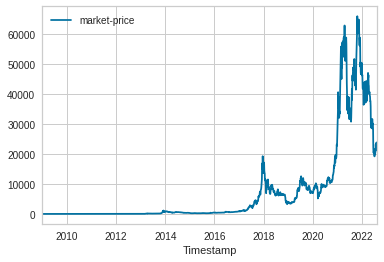

In [ ]:
bitcoin_df.plot()

## Compare Models
เราสามารถใช้่คำสั่ง ``compare_models()`` เพื่อหา Model ที่ดีที่สุดในการทำ Forecasting
* Model = ชื่อ Model
* MAE = Mean Absolute Error (https://en.wikipedia.org/wiki/Mean_absolute_error) ยิ่งน้อยยิ่งดี
* MSE = Mean Square Error (https://en.wikipedia.org/wiki/Mean_squared_error) ยิ่งน้อยยิ่งดี
* RMSE = Root Mean Square Error (https://en.wikipedia.org/wiki/Root-mean-square_deviation) ยิ่งน้อยยิ่งดี
* R2 = Coefficient of determination (https://en.wikipedia.org/wiki/Coefficient_of_determination) ยิ่งเข้าใกล้ 1 ยิ่งดี
* RMSLE - Root Mean Squared Logaritmic Error (RMSLE) (https://hrngok.github.io/posts/metrics/#:~:text=Root%20Mean%20Squared%20Logaritmic%20Error%20(RMSLE)&text=It%20is%20the%20Root%20Mean,possible%200%20(zero)%20values.) ยิ่งน้อยยิ่งดี
* MAPE - Mean absolute percentage error
 (https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) ยิ่งน้อยยิ้งดี
* TT - Time Taken (Sec) เวลาในการใช้

In [ ]:
best = compare_models(fold=1, round=1)

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7efd7ff26950>, include=None, fold=1, round=1, cross_validation=True, sort=MASE, n_select=1, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, parallel=None, caller_params={'self': <pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7efd7ff26950>, 'include': None, 'exclude': None, 'fold': 1, 'round': 1, 'cross_validation': True, 'sort': 'MASE', 'n_select': 1, 'budget_time': None, 'turbo': True, 'errors': 'ignore', 'fit_kwargs': None, 'experiment_custom_tags': None, 'engines': None, 'verbose': True, 'parallel': None, '__class__': <class 'pycaret.time_series.forecasting.oop.TSForecastingExperiment'>}, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
snaive,Seasonal Naive Forecaster,6.2,2.6,6542.0,7566.1,0.3,0.3,-2.0,0.4
arima,ARIMA,7.0,3.0,7362.1,8606.1,0.4,0.3,-2.9,0.6
naive,Naive Forecaster,7.6,3.2,8076.2,9184.3,0.4,0.3,-3.4,5.8
auto_arima,Auto ARIMA,7.6,3.2,8076.2,9184.3,0.4,0.3,-3.4,6.1
exp_smooth,Exponential Smoothing,7.7,3.2,8082.4,9194.0,0.4,0.3,-3.4,0.6
theta,Theta Forecaster,7.7,3.2,8135.8,9251.3,0.4,0.3,-3.5,0.3
ets,ETS,7.8,3.3,8278.6,9402.3,0.4,0.3,-3.6,0.4
croston,Croston,10.1,4.0,10706.0,11564.8,0.5,0.4,-6.0,0.4
grand_means,Grand Means Forecaster,15.7,6.0,16547.0,17115.2,0.7,1.1,-14.3,2.5


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

  "Unsupported estimator `ensemble_forecaster` for method `compare_models()`, removing from model_library"

INFO:logs:Initializing Naive Forecaster
INFO:logs:Total runtime is 9.014606475830079e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7efd7ff26950>, estimator=naive, fold=1, round=1, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=True, metrics=None, display=<pycaret.internal.display.display.CommonDisplay object at 0x7efd7ea14950>, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained mod

INFO:logs:Creating metrics dataframe
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 36
INFO:logs:display_container: 2
INFO:logs:BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                    regressor=OrthogonalMatchingPursuit(fit_intercept=True,
                                                        n_nonzero_coefs=None,
                                                        normalize='deprecated',
                                                        precompute='auto',
                                                        tol=None),
                    sp=7, window_length=7)
INFO:logs:create_model() successfully completed......................................
                    regressor=OrthogonalMatchingPursuit(fit_intercept=True,
                                                        n_nonzero_coefs=None,
                                                        normalize='deprecated',

## Create Model

เราสามารถใช้่คำสั่ง create_model("{ชื่อ_Model}") เพื่อสร้าง model ตามที่เราต้องการ

* 'naive' - Naive Forecaster
* 'grand_means' - Grand Means Forecaster
* 'snaive' - Seasonal Naive Forecaster (disabled when seasonal_period = 1)
* 'polytrend' - Polynomial Trend Forecaster
* 'arima' - ARIMA family of models (ARIMA, SARIMA, SARIMAX)
* 'auto_arima' - Auto ARIMA
* 'exp_smooth' - Exponential Smoothing
* 'croston' - Croston Forecaster
* 'ets' - ETS
* 'theta' - Theta Forecaster
* 'tbats' - TBATS
* 'bats' - BATS
* 'prophet' - Prophet Forecaster
* 'lr_cds_dt' - Linear w/ Cond. Deseasonalize & Detrending
* 'en_cds_dt' - Elastic Net w/ Cond. Deseasonalize & Detrending
* 'ridge_cds_dt' - Ridge w/ Cond. Deseasonalize & Detrending
* 'lasso_cds_dt' - Lasso w/ Cond. Deseasonalize & Detrending
* 'lar_cds_dt' -   Least Angular Regressor w/ Cond. Deseasonalize & Detrending
* 'llar_cds_dt' - Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending
* 'br_cds_dt' - Bayesian Ridge w/ Cond. Deseasonalize & Deseasonalize & Detrending
* 'huber_cds_dt' - Huber w/ Cond. Deseasonalize & Detrending
* 'par_cds_dt' - Passive Aggressive w/ Cond. Deseasonalize & Detrending
* 'omp_cds_dt' - Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending
* 'knn_cds_dt' - K Neighbors w/ Cond. Deseasonalize & Detrending
* 'dt_cds_dt' - Decision Tree w/ Cond. Deseasonalize & Detrending
* 'rf_cds_dt' - Random Forest w/ Cond. Deseasonalize & Detrending
* 'et_cds_dt' - Extra Trees w/ Cond. Deseasonalize & Detrending
* 'gbr_cds_dt' - Gradient Boosting w/ Cond. Deseasonalize & Detrending
* 'ada_cds_dt' - AdaBoost w/ Cond. Deseasonalize & Detrending
* 'lightgbm_cds_dt' - Light Gradient Boosting w/ Cond. Deseasonalize & Detrending
* 'catboost_cds_dt' - CatBoost w/ Cond. Deseasonalize & Detrending


In [ ]:
arima_model = create_model("arima")

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7efd7ff26950>, estimator=arima, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, metrics=None, display=None, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-07-11,9.5620,3.7905,6909.7855,8602.1959,0.1639,0.1859,-1.2662
1,2021-08-16,6.2681,2.6106,4842.8581,6221.3814,0.1063,0.0976,-6.4952
2,2021-09-21,13.4500,5.3085,10834.5320,12862.4828,0.1872,0.2122,-1.7561
3,2021-10-27,6.9329,2.8811,6148.9976,7636.7342,0.1046,0.0967,-6.4300
4,2021-12-02,6.4502,2.3273,5921.7177,6242.2753,0.1257,0.1174,-9.1055
5,2022-01-07,3.8508,1.6405,3752.7655,4573.8187,0.0974,0.0906,-1.4335
6,2022-02-12,3.5334,1.4311,3601.4727,4066.6499,0.0917,0.0866,-2.7331
7,2022-03-20,3.2173,1.5044,3341.2291,4294.0258,0.0768,0.0770,-1.9683
8,2022-04-25,4.2061,1.8052,4528.8759,5227.7285,0.1497,0.1363,-0.8245
9,2022-05-31,6.5148,2.8973,7367.7830,8613.0737,0.3528,0.2830,-2.8786


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:ARIMA Imported successfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with SlidingWindowSplitter(fh=ForecastingHorizon([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', is_relative=True),
           step_length=12, window_length=1525), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 54
INFO:logs:display_container: 3
INFO:logs:ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)
INFO:logs:create_model() successfully completed......................................


## Prediction

In [ ]:
predictions = predict_model(arima_model)

  FutureWarning,

  FutureWarning,



,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,2.9041,1.2232,3170.7348,3579.0806,0.1389,0.1521,-6.6742


In [ ]:
predictions

,y_pred
2022-07-09,18694.6362
2022-07-12,19075.2014
2022-07-15,19784.3824
2022-07-18,19893.2641
2022-07-21,19113.6012
2022-07-24,18387.0811
2022-07-27,19461.6490
2022-07-30,18076.7414
2022-08-02,18546.5580
2022-08-05,19333.5560


In [ ]:
bitcoin_df[-12:]

,market-price
Timestamp,
2022-07-09,21636.45
2022-07-12,19946.31
2022-07-15,20568.90
2022-07-18,20774.23
2022-07-21,23227.22
2022-07-24,22461.70
2022-07-27,21267.33
2022-07-30,23792.00
2022-08-02,23298.94


In [ ]:
predictions.insert(1, "market-price", bitcoin_df[-12:], True)


In [ ]:
predictions

,y_pred,market-price
2022-07-09,18694.6362,21636.45
2022-07-12,19075.2014,19946.31
2022-07-15,19784.3824,20568.90
2022-07-18,19893.2641,20774.23
2022-07-21,19113.6012,23227.22
2022-07-24,18387.0811,22461.70
2022-07-27,19461.6490,21267.33
2022-07-30,18076.7414,23792.00
2022-08-02,18546.5580,23298.94
2022-08-05,19333.5560,22608.30


<AxesSubplot:>

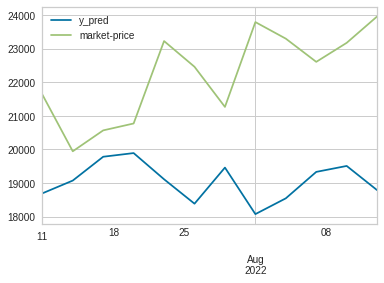

In [ ]:
predictions.plot()

## Plot Model

``plot_model({model}, plot={plot_name})``

default is changed to 'forecast'. List of available plots (ID - Name):
* 'ts' - Time Series Plot
* 'train_test_split' - Train Test Split
* 'cv' - Cross Validation
* 'acf' - Auto Correlation (ACF)
* 'pacf' - Partial Auto Correlation (PACF)
* 'decomp' - Classical Decomposition
* 'decomp_stl' - STL Decomposition
* 'diagnostics' - Diagnostics Plot
* 'diff' - Difference Plot
* 'periodogram' - Frequency Components (Periodogram)
* 'fft' - Frequency Components (FFT)
* 'ccf' - Cross Correlation (CCF)
* 'forecast' - "Out-of-Sample" Forecast Plot
* 'insample' - "In-Sample" Forecast Plot
* 'residuals' - Residuals Plot

In [ ]:
plot_model(arima_model, "ts")

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(arima_model, "forecast")


In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.



In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.




INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(arima_model, "train_test_split")

INFO:logs:Visual Rendered Successfully


In [ ]:
tuned_arima_model = tune_model(arima_model)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7efd7d2bdcd0>, estimator=ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True), fold=None, round=4, n_iter=10, custom_grid=None, optimize=MASE, custom_scorer=None, search_algorithm=None, choose_better=True, fit_kwargs=None, return_tuner=False, verbose=True, tuner_verbose=True, kwargs={}, search_library=pycaret, _allowed_search_algorithms=[None, 'random', 'grid'])
INFO:logs:Checking exceptions


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:22:49
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,ARIMA


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : ARIMA
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters


INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing ForecastingRandomizedGridSearchCV


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

### Finalize, Save Model and Load Model

เมื่อเราได้ Model ที่พร้อมแล้ว เราสามารถทำ ``finalize_model({Model})`` **เพื่อทำการ Train Model บน Dataset ทั้่งหมด (ALL) ใหม่** เพื่อให้โมเดลได้เรียนรู้บน Data ให้ได้มากที่สุดบนรูปแบบ Estimator (Model) และ Hyperparamters ที่เราได้เลือกและได้กำหนดค่าไว้ในตัวแปร {Model}

**Save model**

``save_model({Final_Model}, "ชื่อไฟล์")``
และ

**Load Model**

``{Model} = load_model("ชื่อไฟล์")``
เหมือนตัวอื่นๆ

In [ ]:
final_best = finalize_model(best)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7efd7ff26950>, estimator=NaiveForecaster(sp=7, strategy='last', window_length=None), fit_kwargs=None, groups=None, model_only=False, experiment_custom_tags=None)
INFO:logs:Finalizing NaiveForecaster(sp=7, strategy='last', window_length=None)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7efd7ff26950>, estimator=NaiveForecaster(sp=7, strategy='last', window_length=None), fold=None, round=4, cross_validation=False, predict=False, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, model_only=False, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INF

In [ ]:
save_model(final_best, "snaive_bitcoin_best")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster(sp=7,
                                                                                strategy='last',
                                                                                window_length=None))]))]), model_name=snaive_bitcoin_best, prep_pipe_=None, verbose=True, use_case=MLUsecase.TIME_SERIES, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:snaive_bitcoin_best.pkl saved in current working directory
INFO:logs:ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster(sp=7,
                                                                                strategy='last',
           

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 NaiveForecaster(sp=7,
                                                                                 strategy='last',
                                                                                 window_length=None))]))]),
 'snaive_bitcoin_best.pkl')

In [ ]:
loaded_snaive_bitcoin = load_model("snaive_bitcoin_best")

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=snaive_bitcoin_best, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
loaded_snaive_bitcoin

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster(sp=7,
                                                                                strategy='last',
                                                                                window_length=None))]))])

## Exercise

เรามาลอง Predict ข้อมูลที่มี Pattern ชัดเจนมากกว่า Bitcoin กันเถอะ ข้อมูลคุณภาพอากาศ

![](https://www.researchgate.net/profile/Irena-Markovska-2/publication/340899809/figure/fig2/AS:883882824065027@1587745495992/Dependences-between-criterion-COGT-and-criteria-PT08S1CO-C6H6GT-PT08S2NMHC.ppm)

ปริมาณสารพิษในอากาศที่จับได้ ประกอบไปด้วย
* True hourly averaged concentration CO in mg/m3 - CO(GT)
* PT08.S1 (tin oxide) hourly averaged sensor response - PT08.S1(CO)
* True hourly averaged Benzene concentration in microg/m3 - C6H6(GT)
* PT08.S2 (titania) hourly averaged sensor response - PT08.S2(NMHC)
* True hourly averaged NOx concentration in ppb - NOx(GT)
* PT08.S3 (tungsten oxide) hourly averaged sensor response - PT08.S3(NOx)* True hourly averaged NO2 concentration in microg/m3 - NO2(GT);8) 
* PT08.S4 (tungsten oxide) hourly averaged sensor response - PT08.S4(NO2)
* PT08.S5 (indium oxide) hourly averaged sensor response - PT08.S5(O3);
* Temperature in °C - T
* Relative Humidity (%) - RH
* Absolute Humidity - AH 

(PDF) Application of the InterCriteria Analysis Over Air Quality Data. Available from: https://www.researchgate.net/publication/318029588_Application_of_the_InterCriteria_Analysis_Over_Air_Quality_Data [accessed Aug 14 2022].


In [ ]:
from pycaret.datasets import get_data
airquality = get_data('airquality')

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [ ]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [ ]:
# รวม Date+Time เป็น datetime
airquality["datetime"] = pd.to_datetime(airquality.Date.astype(str) + ' ' + airquality.Time.astype(str))

In [ ]:
airquality = airquality.drop(["Date","Time"], axis=1)

In [ ]:
airquality

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,2005-04-04 10:00:00
9353,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,2005-04-04 11:00:00
9354,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,2005-04-04 12:00:00
9355,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139,2005-04-04 13:00:00


In [ ]:
# dataframe จัดกลุ่มรวมยอด ตามวันที่
airquality=airquality.groupby('datetime',as_index=True).sum()
#แปลง index ที่เป็นอยู่ date ให้เป็น date_time
airquality.index=pd.to_datetime(airquality.index)

In [ ]:
airquality

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406


In [ ]:
from pycaret.time_series import *
exp_name = setup(data = airquality, target="CO(GT)",  fh = 12)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: a73c
INFO:logs:self.variable_keys: {'_gpu_n_jobs_param', 'y', 'seasonality_present', '_all_metrics', 'y_transformed', 'y_test', 'exp_name_log', 'n_jobs_param', 'X_test', 'index_type', 'USI', 'X_transformed', 'seasonal_period', '_ml_usecase', 'enforce_pi', '_all_models_internal', '_all_models', 'X_train_transformed', 'y_train', 'seed', 'data', 'approach_type', 'gpu_param', 'exp_id', 'model_engines', 'X', 'display_container', 'memory', 'X_test_transformed', 'fh', 'enforce_exogenous', 'variable_keys', 'exogenous_present', 'y_train_transformed', 'fold_generator', 'html_param', 'X_train', 'logging_param', '_available_plots', 'log_plots_param', 'strictly_positive', 'all_sp_values', 'master_model_container', 'primary_sp_to_use', 'pipeline', 'y_test_transformed', 'fold_param', 'idx'}
INFO:log

,Description,Value
0,session_id,296
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(9357, 13)"
5,Transformed data shape,"(9357, 13)"
6,Transformed train set shape,"(9345, 13)"
7,Transformed test set shape,"(12, 13)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


INFO:logs:Engine successfully changes for model 'auto_arima' to 'pmdarima'.
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft d

In [ ]:
# Start your work here....

# Clustering

คือการจัดกลุ่มข้อมูลโดยอัตโนมัติ เป็นรูปแบบ Unsupervised Learning โดยไม่ต้องมีค่า y (target class) มักจะใช้ในงานจัดกลุ่มลูกค้า (Customers Segmentation) หรือจัดกลุ่มเนื้อหาเอกสารหรือบทความต่างๆ (Document Grouping) เป็นต้น

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
from sklearn.datasets import make_blobs 
mpl.rcParams['figure.dpi'] = 100

## Synthetic Dataset

รอบนี้เราลองสร้าง Dataset ปลอมๆ ขึ้นมาเอง เพื่อให้รู้ว่าการสร้าง Dataset ไม่จำเป็นต้องมาจากที่มีอยู่แล้วก็ได้ 

In [ ]:
# Generating dataset

cols = ['column1', 'column2', 'column3',
        'column4', 'column5']
arr = make_blobs(n_samples = 1000, n_features = 5, random_state = 20,
                 centers = 3, cluster_std = 1)
data = pd.DataFrame(data = arr[0], columns = cols)
data.head()

,column1,column2,column3,column4,column5
0,2.916076,6.504857,8.246937,6.185952,-9.776481
1,-2.044462,5.282757,5.265467,7.487941,6.347177
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881
3,2.155568,8.776136,5.788650,5.751763,-7.609132
4,-6.650020,5.458227,5.848407,7.150584,5.992247


ในรอบนี้ เราสร้างข้อมูลจำนวน 1000 แถว มี 5 Features (Columns) โดยมีกระจุกตัวกันอยู่ 3 กลุ่ม (Clusters) การใช้ชุดข้อมูลสังเคราะห์เพื่อทดสอบโมเดลการทำคลัสเตอร์ของเรามีประโยชน์หลายประการ ข้อได้เปรียบหลักคือเราทราบจำนวนคลัสเตอร์จริงแล้ว ดังนั้นเราจึงสามารถประเมินประสิทธิภาพของโมเดลได้อย่างง่ายดาย โดยทั่วไป ข้อมูลในโลกแห่งความเป็นจริงจะซับซ้อนกว่าเนื่องจากไม่มีคลัสเตอร์ที่แยกจากกันอย่างชัดเจนเสมอไป

## Explore Data
เราลองมาดู Data เรากันว่าหน้าตาเป็นอย่างไร

### Histogram
เนื่องจากมี 3 Clusters ที่กระจุกตัวแตกต่างกัน ทำให้เราเห็นข้อมูลในแต่ละ Column มีจุด Peak อยู่ 2-3 จุด หรือเรียกว่า (bimodal หรือ multimodal) 

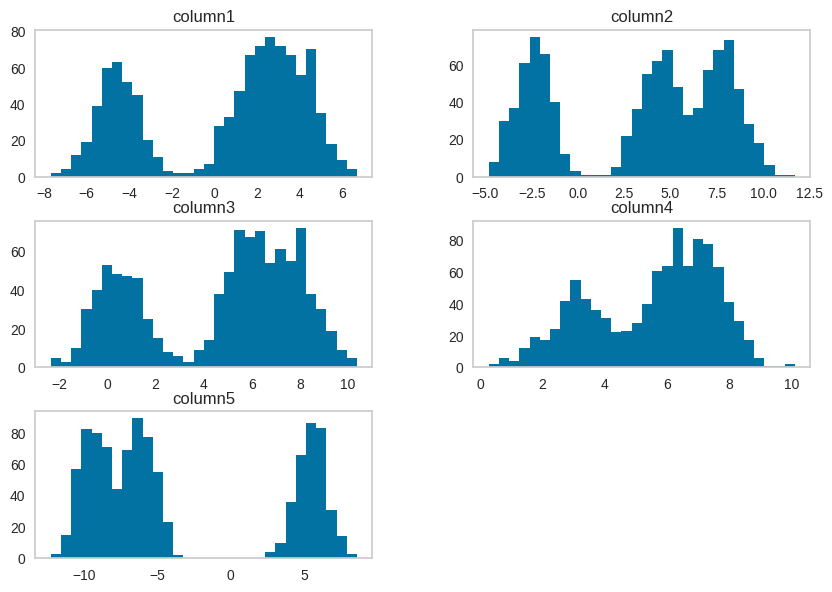

In [ ]:
# Plotting histogram

data.hist(bins = 30, figsize = (10,7), grid = False) 
plt.show()

### Color-encoded Matrix

ดูความสัมพันธ์ระหว่าง Feature X ด้วย ``corr()`` และสร้างเป็น Heatmap มาให้ดู
* 1 ไปด้วยกันเสมอ
* -1 สวนทางกันเสมอ

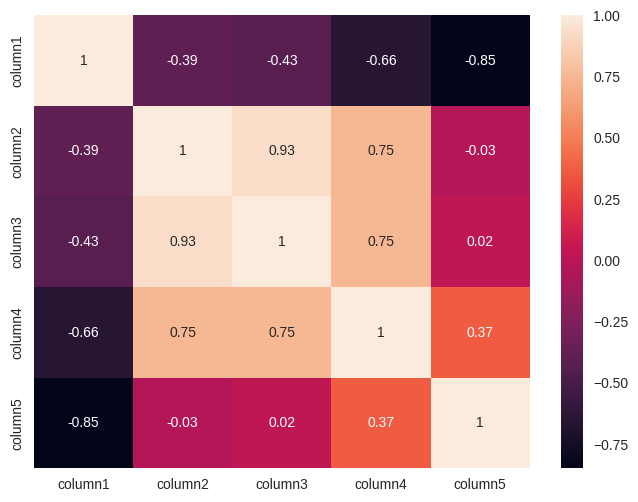

In [ ]:
# Plotting color-encoded matrix

plt.figure(figsize=(8, 6)) 
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

สังเกตุได้ว่า Col2, Col3 จะมี Correlation ใกล้เคียงกันสูง (แต่อย่างไรก็ตามก็ขึ้นกับการ Random ณ ขณะนั้่นด้่วย)

### การดู Scatter plot เพื่อดู ความสัมพันธ์ระหว่าง Feature X

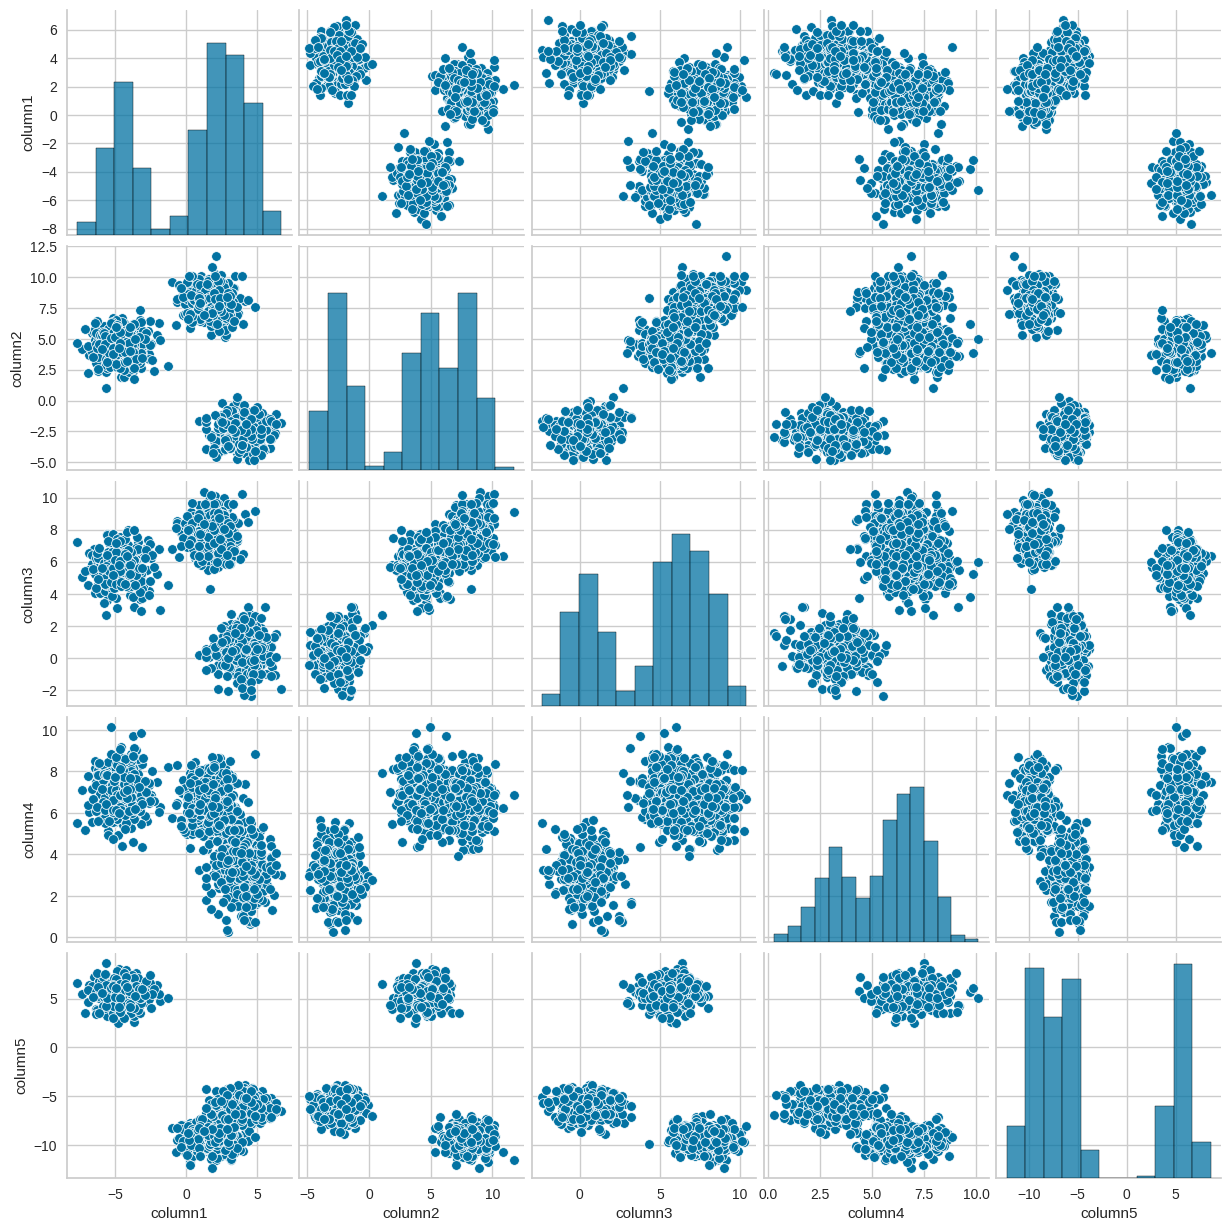

In [ ]:
sns.pairplot(data)
plt.show()

## Clustering Prediction

การ Setup ของ Clustering จะมีความแตกต่างจากตัวอื่นๆ ดังนี้

1. *data = dataframe ที่เราต้่องการที่จะนำไป Train (จำเป็นต้องใส่)
1. session_id = เลขประจำ session เป็นเลขอะไรก็ได้ เราสามารถใช้อ้างอิงได้ภายหลัง
1. pca: bool, default = False = เปิดการใช้ PCA เพื่อลดจำนวน Features ลงหรือไม่
1.  pca_method: str, default = 'linear' วิธีการทำ PCA, Possible values are:
    - 'linear': Uses Singular Value  Decomposition.
    - 'kernel': Dimensionality reduction through the use of RBF kernel.
    - 'incremental': Similar to 'linear', but more efficient for large datasets.
1. pca_components: int, float, str or None, default = None จำนวนของ pca ที่ต้องการเก็บไว้. This parameter is ignored when `pca=False`.
    - If None: All components are kept.
    - If int: Absolute number of components.
    - If "mle": Minka’s MLE is used to guess the dimension (ony for pca_method='linear').
1. Transformation = หากข้อมูลไม่เป็น Normal Distribution อาทิเช่นเอนเอียงไปด้านนึง เราควรปรับค่านี้ให้เป็น True ซึ่งระบบจะทำการแปลงข้่อมูลให้เป็น Normal Distribution ให้เรา
1. Normalize = ทำการแปลงค่า numeric_features ทั้งหมดให้อยู่ระหว่าง -e..e โดยใช้หลักการของ z-score = (x - mean) / standard deviation


In [ ]:
from pycaret.clustering import *
# PyCaret environment setup.Setting different parameters in setup() function
# to prepare model training and deployment data.

cluster = setup(data, session_id = 7652)

INFO:logs:PyCaret ClusteringExperiment
INFO:logs:Logging name: cluster-default-name
INFO:logs:ML Usecase: MLUsecase.CLUSTERING
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: f6c1
INFO:logs:self.variable_keys: {'exp_id', '_gpu_n_jobs_param', 'display_container', 'memory', 'X', '_all_metrics', 'variable_keys', 'exp_name_log', 'n_jobs_param', 'USI', 'logging_param', '_available_plots', '_ml_usecase', 'log_plots_param', '_all_models_internal', 'master_model_container', '_all_models', 'idx', 'seed', 'data', 'pipeline', 'gpu_param', 'html_param'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.13
INFO:logs:python_build: ('default', 'Apr 24 2022 01:04:09')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=13617745920, available=11611111424, percent=14.7, used=1977847808, free=9328275456, active=2347229184, inactive=1563693056, buffers=221483008, cached=2090139648, shared=13148

,Description,Value
0,Session id,7652
1,Original data shape,"(1000, 5)"
2,Transformed data shape,"(1000, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,constant
8,Low variance threshold,0
9,CPU Jobs,-1


'kmodes' is a soft dependency and not included in the pycaret installation. Please run: `pip install kmodes` to install.
Alternately, you can install this by running `pip install pycaret[models]`
'kmodes' is a soft dependency and not included in the pycaret installation. Please run: `pip install kmodes` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:setup() successfully completed in 0.56s...............


## Compare Model?
Compare Model ไม่สามารถทำได้ เพราะเนื่องจากเราไม่มีเฉลย เพราะฉะนั้นเราต้องไล่ Create_model ไปแล้วดูผลของการจัดกลุ่มด้วยตาของมนุษย์แทน

## Create Model
สร้าง Model ด้วยคำสั่ง ``create_model({ชื่อ Model}, num_clusters={จำนวน Cluster})`` หากเราไม่กำหนด ``num_clusters`` จะมีค่า Default = 4

* 'kmeans' - K-Means Clustering
* 'ap' - Affinity Propagation
* 'meanshift' - Mean shift Clustering
* 'sc' - Spectral Clustering
* 'hclust' - Agglomerative Clustering
* 'dbscan' - Density-Based Spatial Clustering
* 'optics' - OPTICS Clustering
* 'birch' - Birch Clustering
* 'kmodes' - K-Modes Clustering

In [ ]:
kmeans_model = create_model("kmeans")

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, estimator=kmeans, num_clusters=4, fraction=0.05, ground_truth=None, round=4, fit_kwargs=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, raise_num_clusters=False, display=None, kwargs={})
INFO:logs:Checking exceptions


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5843,6047.8548,1.2212,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Importing untrained model
INFO:logs:K-Means Clustering Imported succesfully
INFO:logs:Fitting Model
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_models() succesfully completed......................................


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


### ค่า Error ของการทำ Clustering

ค่า Error จากการทำ Clustering นั้น ไม่ได้เกิดจาก y label (เฉลย) ซึ่งข้อมูลนี้มันไม่มี แต่มันเกิดจากพอเค้าลอง Assign Cluster ให้แต่ละ Dataset แล้วดูว่าคุณลักษณะของ Cluster นั้น ดีหรือแย่อย่างไร อาทิเช่น ถ้าทุกจุดเกาะกลุ่มกันแน่นจนเป็นจุดเดียวกัน = ดี , แต่ถ้าหากกระจายไปปนกับ cluster อื่นๆ = ไม่ดี โดยมีหลักในการดูดังนี้

* Silhouette - มีค่าระหว่าง -1 ถึง 1 - ยิ่งเยอะยิ่งดี ถ้า 1 ทุกจุดใน Cluster มีคุณลักษณะตรงกับจุดอื่นๆใน Cluster - https://en.wikipedia.org/wiki/Silhouette_(clustering)
* Calinski-Harabasz - สัดส่วนระยะห่าง (Distance Ratio) ของจุดระหว่างจุดใน Cluster กับ Cluster อื่นๆ หารด้วย จุดใน Cluster กับ Cluster ของตน - คะแนนยิ่งเยอะยิ่งดี 
* Davies-Bouldin - สัดส่วนระยะห่าง (Distance Ratio) ของ จุดใน Cluster กับ Cluster ของตน หารด้วย จุดระหว่างจุดใน Cluster กับ Cluster อื่นๆ - คะแนนยิ่งน้อยยิ่งดี
* Homogeneity - มีค่าระหว่าง 0 ถึง 1 - ยิ่งเยอะยิ่งดี  - ในกรณีมี Class y เราสามารถวัดได้ว่า มีจุดไหนที่ถูก Cluster ได้มากกว่า 2 จุดหรือไม่ ถ้าไม่มีเลย แสดงว่าแบ่ง Cluster ได้ดี ค่่า Homongenity = 1.0 
* Rand Index - มีค่าระหว่าง 0 ถึง 1 - ยิ่งเยอะยิ่งดี  - ในกรณีมี Class y ความแม่นยำของการเลือก Cluster ที่ถูกต้องให้แต่ละจุด (เหมือน Accuracy ใน Classification)
* Completeness  - มีค่าระหว่าง 0 ถึง 1 - ยิ่งเยอะยิ่งดี  - ในกรณีมี Class y จำนวนจุดในข้อมูลที่เฉลยหากได้อยู่ Cluster เดียวกันหมดได้จะค่าเป็น 1 ดูว่าสามารถเก็บมาครบได้หรือไม่ (เหมือน Recall ใน Classification)

## Plot Model

``plot_model({ModelVar}, '{PlotName}')``

* 'cluster' - Cluster PCA Plot (2d)
* 'tsne' - Cluster t-SNE (3d)
* 'elbow' - Elbow Plot
* 'silhouette' - Silhouette Plot
* 'distance' - Distance Plot
* 'distribution' - Distribution Plot

### Elbow Plot
ใช้หาจำนวน Cluster ที่ดีที่สุดบน Dataset

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=elbow, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: elbow
INFO:logs:Fitting Model


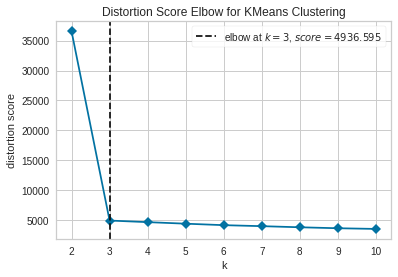

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [ ]:
# Plotting the model
  
plot_model(kmeans_model, 'elbow')

เมื่อเรารู้แล้่วว่าจำนวน Cluster ที่ดีที่สุดคือ 3 เราก็ทำการ Train ใหม่ให้แม่นยำขึ้น

In [ ]:
kmeans_model = create_model('kmeans', num_clusters = 3)

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, estimator=kmeans, num_clusters=3, fraction=0.05, ground_truth=None, round=4, fit_kwargs=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, raise_num_clusters=False, display=None, kwargs={})
INFO:logs:Checking exceptions


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7972,8565.5114,0.2904,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Importing untrained model
INFO:logs:K-Means Clustering Imported succesfully
INFO:logs:Fitting Model
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_models() succesfully completed......................................


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


สังเกตุได้ว่า Error Matrices ทุกตัวดีขึ้น อย่างมีนัยสำคัญ

### PCA Plot

ทำการ Dimensionally Reduction โดยการใช้ Principal Component Analysis (PCA) จาก 5 มิติ -> 2 มิติ เพื่อให้ทำการแยกแยะง่ายขึ้น

In [ ]:
# Plotting PCA plot

plot_model(kmeans_model, 'cluster')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=cluster, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: cluster
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), transformation=True, score=True, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:Transformation parameter set to True. Assigned clusters are attached on transformed dataset.
INFO:logs:(1000, 6)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting PCA()
INFO:logs:Sorting dataframe
INFO:logs:Rendering V

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


### TSNE Plot

In [ ]:
# Plot แบบ 3 มิติด้่วย tsne แต่ใช้เวลารันนาน
plot_model(kmeans_model, 'tsne')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=tsne, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: tsne
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), transformation=True, score=False, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:Transformation parameter set to True. Assigned clusters are attached on transformed dataset.
INFO:logs:(1000, 6)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting TSNE()

The default initialization in TSNE will change fr

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


### Silhouette Plot

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=silhouette, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: silhouette
INFO:logs:Fitting Model

X does not have valid feature names, but KMeans was fitted with feature names




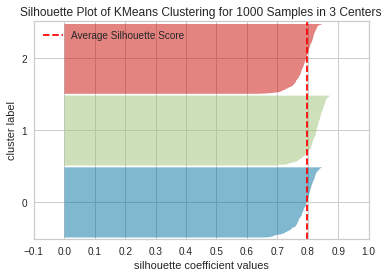

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [ ]:
plot_model(kmeans_model, 'silhouette')

### Distance Plot

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=distance, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: distance
INFO:logs:Fitting Model

X does not have valid feature names, but KMeans was fitted with feature names




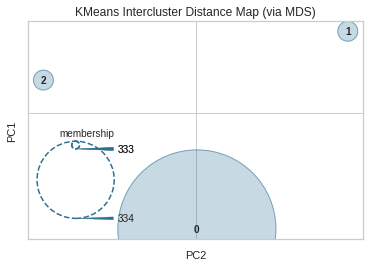

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [ ]:
plot_model(kmeans_model, 'distance')

### Distribution Plot

In [ ]:
plot_model(kmeans_model, 'distribution')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=distribution, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: distribution
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), transformation=False, score=True, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(1000, 6)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Sorting dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


## Evaluate Model

In [ ]:
evaluate_model(kmeans_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## เรามาลอง Setup ใหม่แบบเปิดให้ PCA ให้เราได้กันเถอะ จะได้รู้ว่าดีขึ้นแค่ไหน

In [ ]:
from pycaret.clustering import *
# PyCaret environment setup.Setting different parameters in setup() function
# to prepare model training and deployment data.

cluster = setup(data, session_id = 7653, pca=True, pca_method="linear")

INFO:logs:PyCaret ClusteringExperiment
INFO:logs:Logging name: cluster-default-name
INFO:logs:ML Usecase: MLUsecase.CLUSTERING
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 83af
INFO:logs:self.variable_keys: {'exp_id', '_gpu_n_jobs_param', 'display_container', 'memory', 'X', '_all_metrics', 'variable_keys', 'exp_name_log', 'n_jobs_param', 'USI', 'logging_param', '_available_plots', '_ml_usecase', 'log_plots_param', '_all_models_internal', 'master_model_container', '_all_models', 'idx', 'seed', 'data', 'pipeline', 'gpu_param', 'html_param'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.13
INFO:logs:python_build: ('default', 'Apr 24 2022 01:04:09')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=13617745920, available=11577298944, percent=15.0, used=2014175232, free=9289162752, active=2381336576, inactive=1568165888, buffers=222158848, cached=2092249088, shared=13148

,Description,Value
0,Session id,7653
1,Original data shape,"(1000, 5)"
2,Transformed data shape,"(1000, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,constant
8,Low variance threshold,0
9,PCA,True


'kmodes' is a soft dependency and not included in the pycaret installation. Please run: `pip install kmodes` to install.
Alternately, you can install this by running `pip install pycaret[models]`
'kmodes' is a soft dependency and not included in the pycaret installation. Please run: `pip install kmodes` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:setup() successfully completed in 0.27s...............


In [ ]:
new_kmeans_model = create_model('kmeans', num_clusters = 3)

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7d154810>, estimator=kmeans, num_clusters=3, fraction=0.05, ground_truth=None, round=4, fit_kwargs=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, raise_num_clusters=False, display=None, kwargs={})
INFO:logs:Checking exceptions


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7972,8565.5143,0.2904,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Importing untrained model
INFO:logs:K-Means Clustering Imported succesfully
INFO:logs:Fitting Model
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7653, tol=0.0001, verbose=0)
INFO:logs:create_models() succesfully completed......................................


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7653, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


ไม่ได้ช่วย แสดงว่าโจทย์นี้ยังไม่ซับซ้อนเท่าไร่ กระจายตัวกันสวยอยู่แล้วใน 5-Dimension อยู่แล้ว จะแยกใน 2-Dimension ก็ไม่ต่างกัน

## Assign Model
เหมือน Prediction แต่ว่าเนื่องจากเป็น Clustering ที่ไม่มี Y จะใช้คำว่า Prediction ไม่ได้ เลยใช้คำว่า Assign แทน , คืนค่า Cluster Assigment ของ Training Dataset มาให้ทั้งหมด
``assign_model({ModelVar})`` 

In [ ]:
assignments = assign_model(kmeans_model)

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7d154810>, model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(1000, 6)
INFO:logs:assign_model() succesfully completed......................................


In [ ]:
assignments

,column1,column2,column3,column4,column5,Cluster
0,2.916076,6.504857,8.246937,6.185952,-9.776482,Cluster 0
1,-2.044462,5.282757,5.265467,7.487941,6.347177,Cluster 1
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881,Cluster 2
3,2.155568,8.776135,5.788650,5.751763,-7.609132,Cluster 0
4,-6.650020,5.458227,5.848407,7.150584,5.992247,Cluster 1
...,...,...,...,...,...,...
995,1.832239,7.090995,8.237264,6.330610,-8.365552,Cluster 0
996,1.248012,6.976342,8.361300,7.216456,-8.557013,Cluster 0
997,3.193577,-2.260172,0.468954,3.136106,-5.732294,Cluster 2
998,-3.606641,4.963537,4.570116,6.171589,5.253184,Cluster 1


## Finalize, Save Model and Load Model
เหมือนกับของทุกๆ Library ครับ

## Clustering Exercise
* ลอง Clustering กับ Data จริง ชื่อว่า ``jewellery`` ฐานข้อมูลสมาขิกลูกค้าที่เข้ามาซื้อเครื่องประดับของร้านค้าประกอบไปด้วย

1. age - อายุ
1. income - รายได้ (USD)
1. SpendingScore - คะแนนการใช้จ่ายในร้านค้า ยิ่งเยอะยิ่งใช้จ่ายเยอะ
1. Savings - เงินเก็บที่มีทั้งหมด (USD)

ลองหาดูว่าลูกค้าของร้านนี้มีกี่กลุ่ม และแต่ละกลุ่มมีจุดเด่นเรื่องอะไรบ้าง

In [ ]:
from pycaret.datasets import get_data
jewellery = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [ ]:
jewellery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:
from pycaret.clustering import *
#exp = setup(data = jewellery) << Start working here.

# Contact Author & FAQ
* Kobkrit Viriyayudhakorn
* สมาคมผู้ประกอบการปัญญาประดิษฐ์ประเทศไทย
* AIEAT
* kobkrit@aieat.or.th